**Import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels.api as sm
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency

In [2]:
#reading dataset
df = pd.read_csv('./dataset/Telco-Customer-Churn.csv')
df

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Let us check if there are any missing entries in the dataset

In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Remove the non essential features

In [5]:
# Clearly the feature 'customerID' is of no use to us and can be dropped
df.drop(columns='customerID',inplace=True)

In [6]:
df.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

For each quantitative attribute, calculate its average, standard deviation, minimum, and maximum values.

In [7]:
from pandas.api.types import is_numeric_dtype

for col in df.columns:
    if is_numeric_dtype(df[col]):
        print('%s:' % (col))
        print('\t Mean = %.2f' % df[col].mean())
        print('\t Standard deviation = %.2f' % df[col].std())
        print('\t Minimum = %.2f' % df[col].min())
        print('\t Maximum = %.2f' % df[col].max())

SeniorCitizen:
	 Mean = 0.16
	 Standard deviation = 0.37
	 Minimum = 0.00
	 Maximum = 1.00
tenure:
	 Mean = 32.37
	 Standard deviation = 24.56
	 Minimum = 0.00
	 Maximum = 72.00
MonthlyCharges:
	 Mean = 64.76
	 Standard deviation = 30.09
	 Minimum = 18.25
	 Maximum = 118.75


In [8]:
# the TotalCharges column should have come under quantitative feature
df["TotalCharges"] = df["TotalCharges"].apply(pd.to_numeric, errors='ignore')

In [9]:
df["TotalCharges"].describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [10]:
df["TotalCharges"].replace(' ', np.nan, inplace=True)

In [11]:
df["TotalCharges"].isnull().sum()

11

In [12]:
# let us drop all rows with any missing value
df.dropna(inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [14]:
# now let us reprint the standard measures for numeric features 
description = df.describe()
description = description.drop(["25%", "50%", "75%"])  # Remove rows for those percentiles
print(description)


       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.300441
std         0.368844    24.545260       30.085974   2266.771362
min         0.000000     1.000000       18.250000     18.800000
max         1.000000    72.000000      118.750000   8684.800000


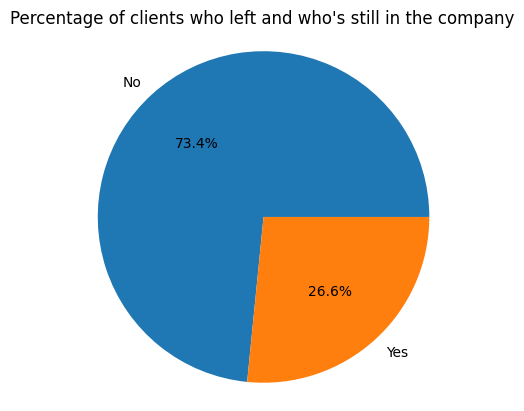

In [15]:
churn_counts = df['Churn'].value_counts()
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%')
plt.title("Percentage of clients who left and who's still in the company")
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

#### Observation
- More than one-forth customer left the company 

### Let us visulaise data by grouping different features using groupBy method

In [16]:
grouped_gender_churn = df.groupby(['gender', 'Churn'])['Churn'].count()
print(grouped_gender_churn)

gender  Churn
Female  No       2544
        Yes       939
Male    No       2619
        Yes       930
Name: Churn, dtype: int64


In [17]:
grouped_SeniorCitizen_churn = df.groupby(['SeniorCitizen', 'Churn'])['Churn'].count()
print(grouped_SeniorCitizen_churn)

SeniorCitizen  Churn
0              No       4497
               Yes      1393
1              No        666
               Yes       476
Name: Churn, dtype: int64


Observation
- Customers who are senior citizen appear to have a lower churn rate compared to those who are not. 

In [18]:
grouped_Partner_churn = df.groupby(['Partner', 'Churn'])['Churn'].count()
print(grouped_Partner_churn)

Partner  Churn
No       No       2439
         Yes      1200
Yes      No       2724
         Yes       669
Name: Churn, dtype: int64


In [19]:
grouped_Dependents_churn = df.groupby(['Dependents', 'Churn'])['Churn'].count()
print(grouped_Dependents_churn)

Dependents  Churn
No          No       3390
            Yes      1543
Yes         No       1773
            Yes       326
Name: Churn, dtype: int64


Observation
- Customers with dependents appear to have a lower churn rate compared to those without dependents. 
- This is indicated by the smaller count of customers with dependents who churned.

In [20]:
grouped_Dependents_churn = df.groupby(['PhoneService', 'Churn'])['Churn'].count()
print(grouped_Dependents_churn)

PhoneService  Churn
No            No        510
              Yes       170
Yes           No       4653
              Yes      1699
Name: Churn, dtype: int64


In [21]:
grouped_Dependents_churn = df.groupby(['InternetService', 'Churn'])['Churn'].count()
print(grouped_Dependents_churn)

InternetService  Churn
DSL              No       1957
                 Yes       459
Fiber optic      No       1799
                 Yes      1297
No               No       1407
                 Yes       113
Name: Churn, dtype: int64


Observation
-  Customers with Fiber optic tend to have a notably higher churn rate compared to customers with DSL or no Internet Service

In [22]:
grouped_paperless_churn = df.groupby(['PaperlessBilling', 'Churn'])['Churn'].count()
print(grouped_paperless_churn)

PaperlessBilling  Churn
No                No       2395
                  Yes       469
Yes               No       2768
                  Yes      1400
Name: Churn, dtype: int64


**Observation**
- Customers with Paperless Billing tend to have a higher churn rate compared to those without Paperless Billing

### Let us play with the crosstab feature of panda ###

In [23]:
pd.crosstab(df['PaymentMethod'],df['Churn'],margins=True)

Churn                        No   Yes   All
PaymentMethod                              
Bank transfer (automatic)  1284   258  1542
Credit card (automatic)    1289   232  1521
Electronic check           1294  1071  2365
Mailed check               1296   308  1604
All                        5163  1869  7032

**Observation**
- Customers who use electronic check as payment method have higher churn rate than others

In [24]:
pd.crosstab(df['Contract'],df['Churn'],margins=True)

Churn             No   Yes   All
Contract                        
Month-to-month  2220  1655  3875
One year        1306   166  1472
Two year        1637    48  1685
All             5163  1869  7032

**Observation**
- Customers who have month-to-month contract have higher churn rate than others

In [25]:
pd.crosstab(df['TechSupport'],df['Churn'],margins=True)

Churn                  No   Yes   All
TechSupport                          
No                   2026  1446  3472
No internet service  1407   113  1520
Yes                  1730   310  2040
All                  5163  1869  7032

<AxesSubplot:xlabel='Churn', ylabel='count'>

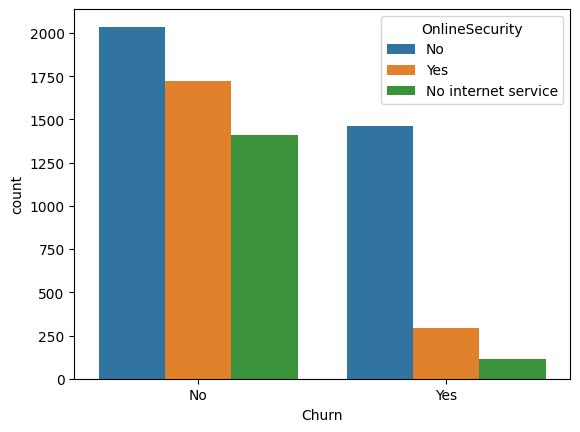

In [26]:
sns.countplot(data=df,x="Churn",hue="OnlineSecurity")

<AxesSubplot:xlabel='Churn', ylabel='count'>

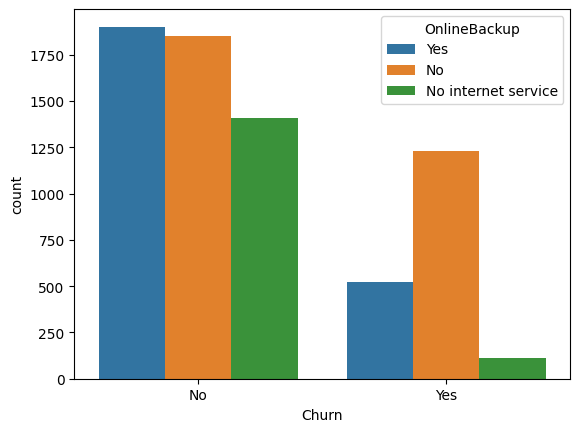

In [27]:
sns.countplot(data=df,x="Churn",hue="OnlineBackup")

**Observation**
- Customers with no online security or online backup have a higher churn rate

### Let us create count plots to visualize the distribution of categorical variables.

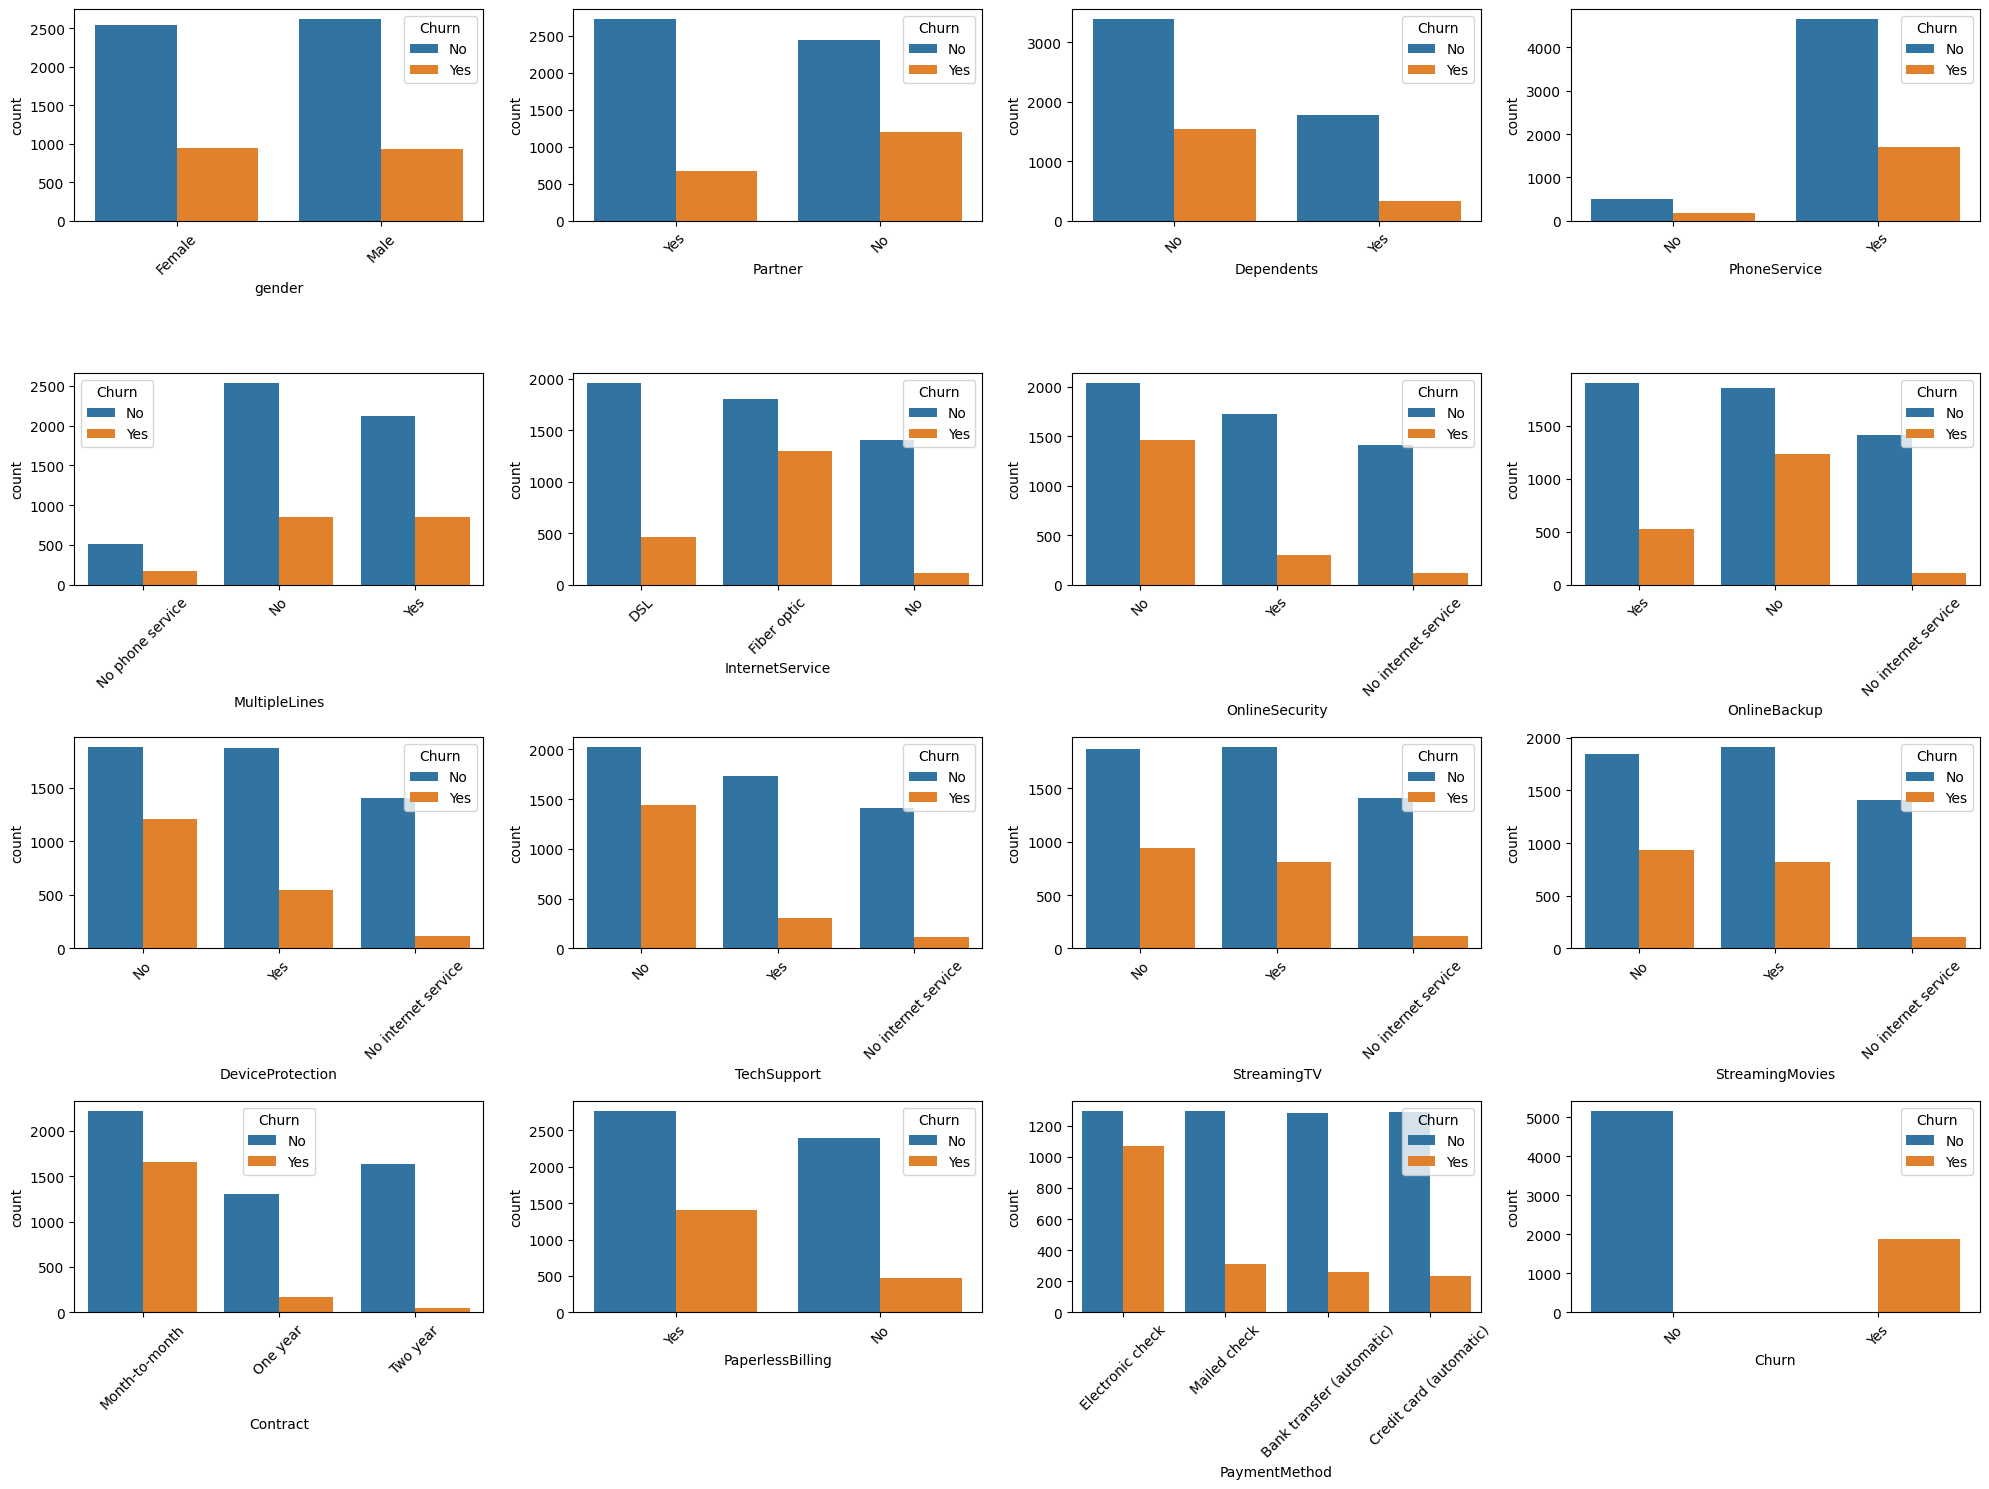

In [28]:
categorical_columns = df.select_dtypes(include=['object'])
plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_columns.columns, 1):
    plt.subplot(4, 4, i)
    sns.countplot(data=df, x=col, hue='Churn')
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.show()


### Let us explore the distribution of numeric features ###

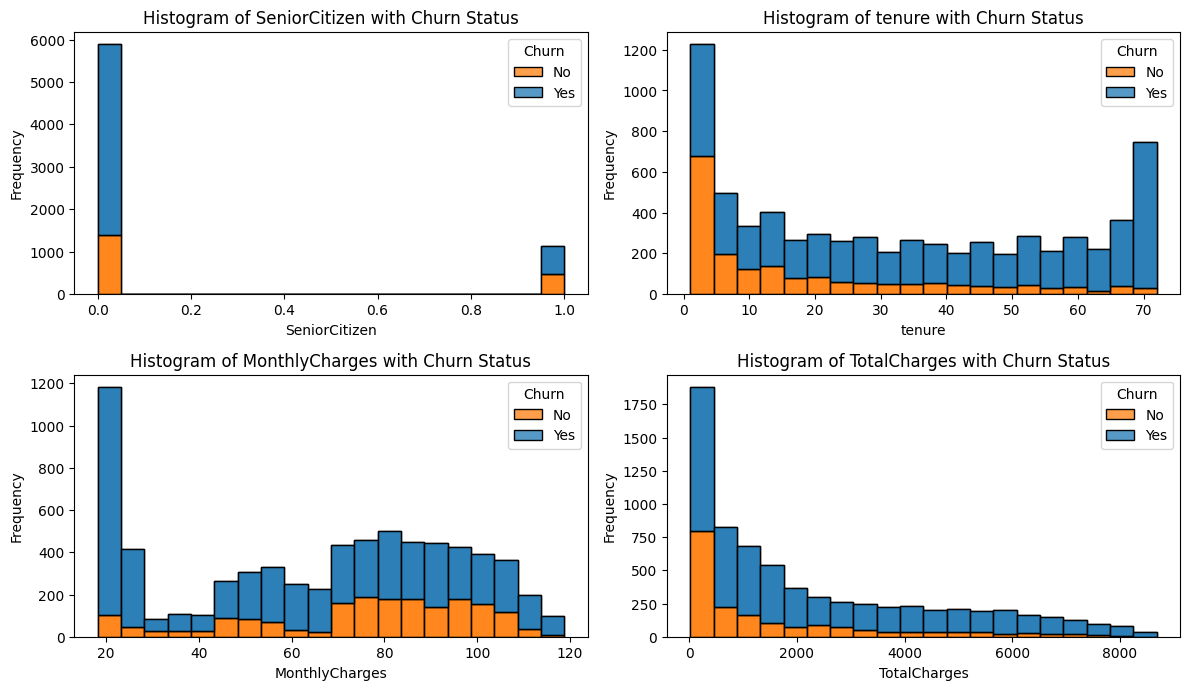

In [29]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
churn_labels = ['No', 'Yes']

plt.figure(figsize=(12, 10))
for i, col in enumerate(numeric_columns.columns, 1):
    plt.subplot(3, 2, i)  # Adjust rows and columns as needed
    for churn_label in churn_labels:
        sns.histplot(data=df, x=col, hue='Churn', hue_order=churn_labels, multiple='stack', bins=20)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col} with Churn Status')
    plt.legend(title='Churn', loc='upper right', labels=churn_labels)
    plt.tight_layout()

plt.show()

### Let us visualize the correlation between numeric variables using a heatmap.

In [30]:
#assigning telecom df values since dont want to corrupt original data
telecom = df.copy() 

In [31]:
# Converting Yes to 1 and No to 0

telecom['PhoneService'] = telecom['PhoneService'].map({'Yes': 1, 'No': 0})
telecom['PaperlessBilling'] = telecom['PaperlessBilling'].map({'Yes': 1, 'No': 0})
telecom['Churn'] = telecom['Churn'].map({'Yes': 1, 'No': 0})
telecom['Partner'] = telecom['Partner'].map({'Yes': 1, 'No': 0})
telecom['Dependents'] = telecom['Dependents'].map({'Yes': 1, 'No': 0})

In [32]:
X = telecom.drop(['Churn'],axis=1)
y = telecom['Churn']
telecom =telecom.drop(['Churn'],axis=1)

In [33]:
telecom.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0  Female              0        1           0       1             0   
1    Male              0        0           0      34             1   
2    Male              0        0           0       2             1   
3    Male              0        0           0      45             0   
4  Female              0        0           0       2             1   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

   PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  
0                 1           Electronic check           29.85         29.85  
1                 0               Mailed check           56.95       1889.50  
2                 1               Mailed check           53.85        108.15  
3                 0  Bank transfer (automatic)           42.30       1840.75  
4                 1           Electronic check           70.70        151.65

<AxesSubplot:>

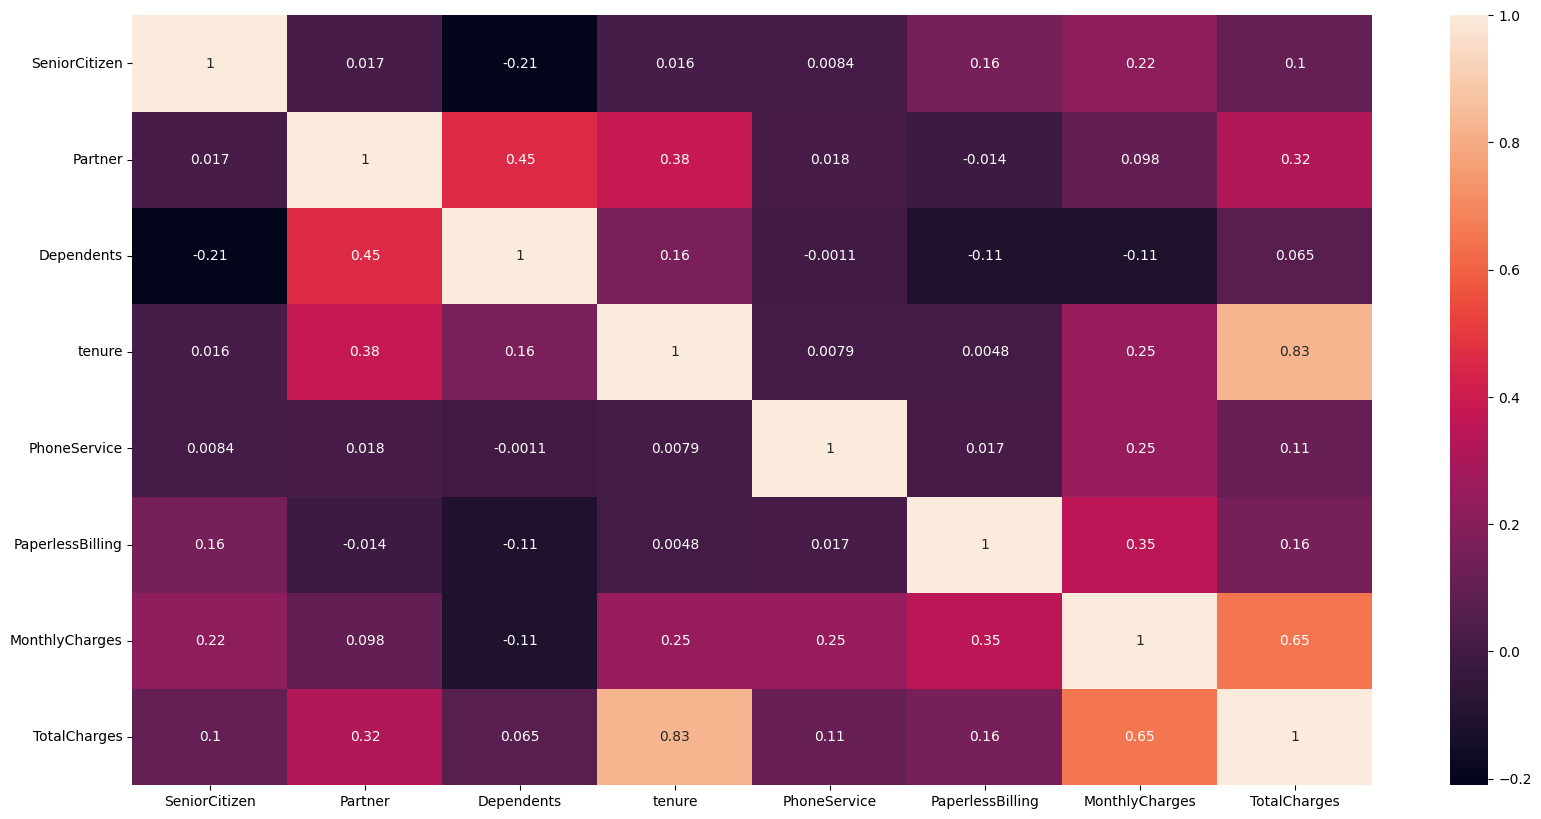

In [34]:
plt.figure(figsize=(20,10))
sns.heatmap(telecom.corr(),annot = True)

### Let us calculate Spearman's correlation coefficient and p-value ###
**P-value**
- p >0.05 : reject null hypothesis, the parameters are not correlated
- p <0.05 : reject null hypothesis, the parameters are not correlated

**Spearman's Rank Coefficient**
- R =  1  :  Strong positive relation
- R =  0  :  Not correlated
- R = -1  : Strong negative relation


In [35]:
corr, pval = spearmanr(telecom['tenure'], telecom['TotalCharges'])
 
# print the result
print("Spearman's correlation coefficient:", corr)
print("p-value:", pval)

Spearman's correlation coefficient: 0.8891770805365491
p-value: 0.0


**Observation**<br>
Tenure and Total Charge are highly correlated

###  Let us do EDA on the dataset

##### 1. Let us plot **boxplot** for few attributes

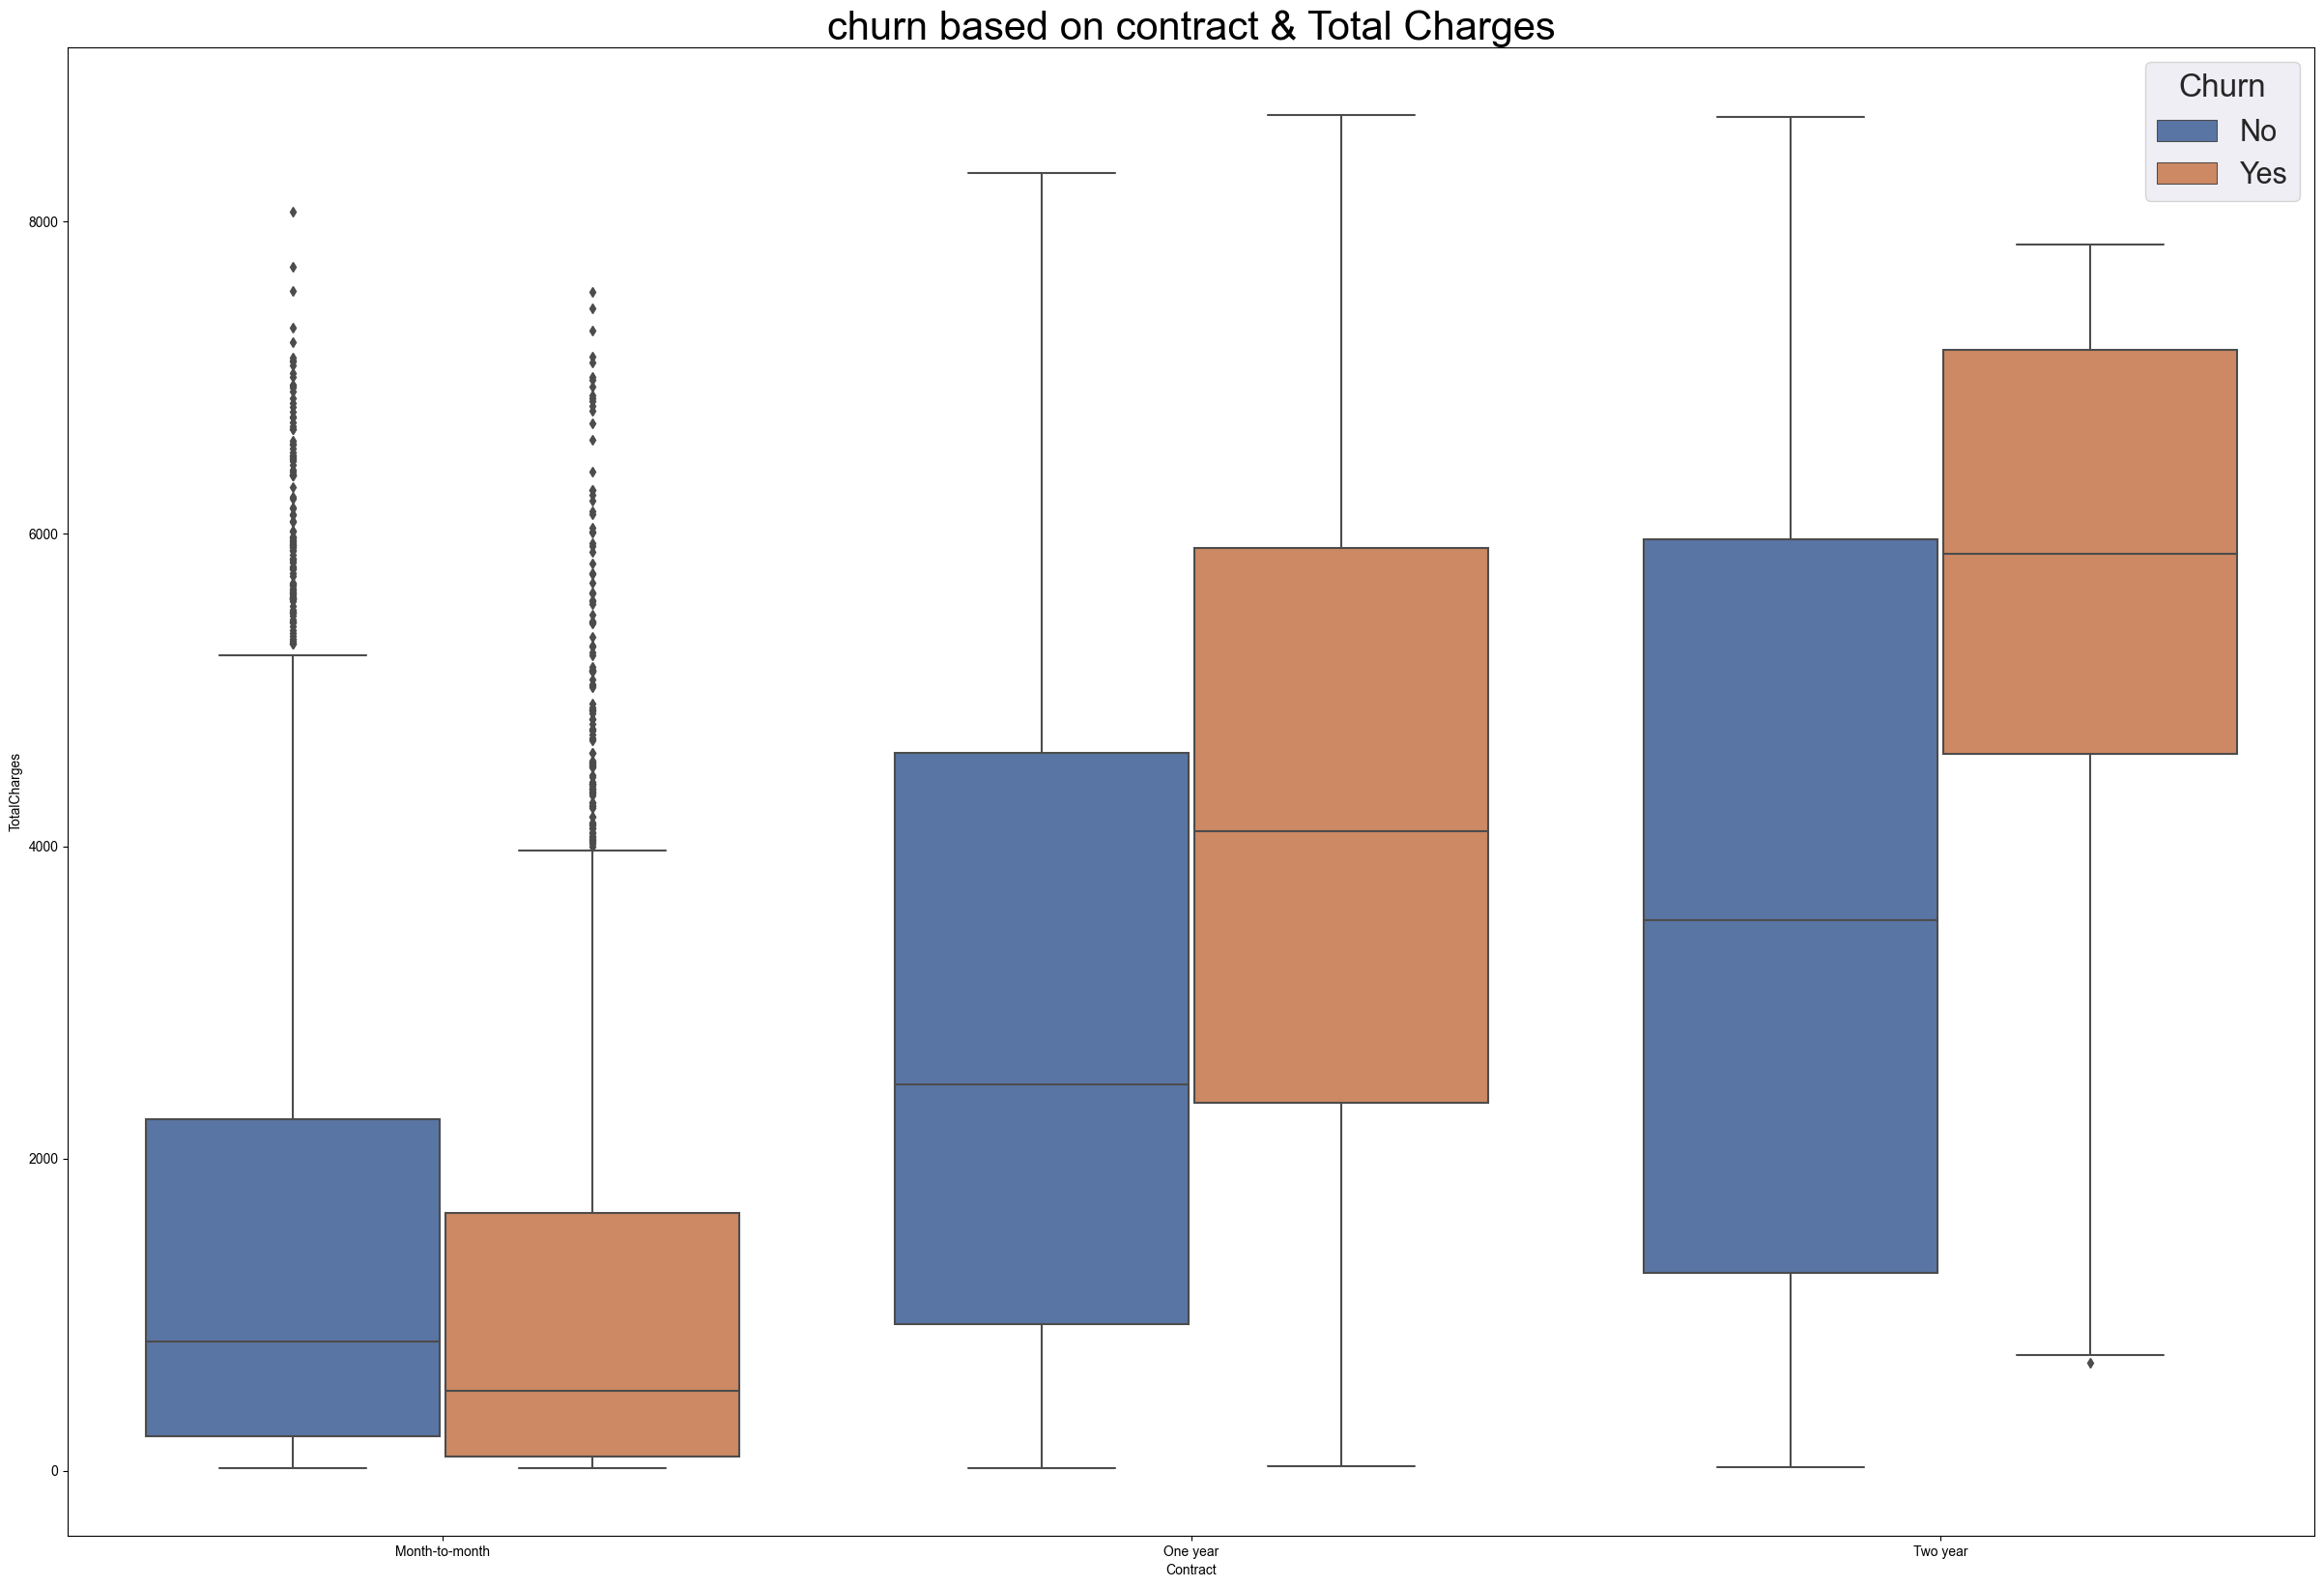

In [36]:
fig, ax = plt.subplots(figsize=(30, 20))
sns.set(font_scale=2)
sns.boxplot(data=df,x="Contract",y="TotalCharges",hue="Churn")
plt.title("churn based on contract & Total Charges",fontsize=30)
plt.show()

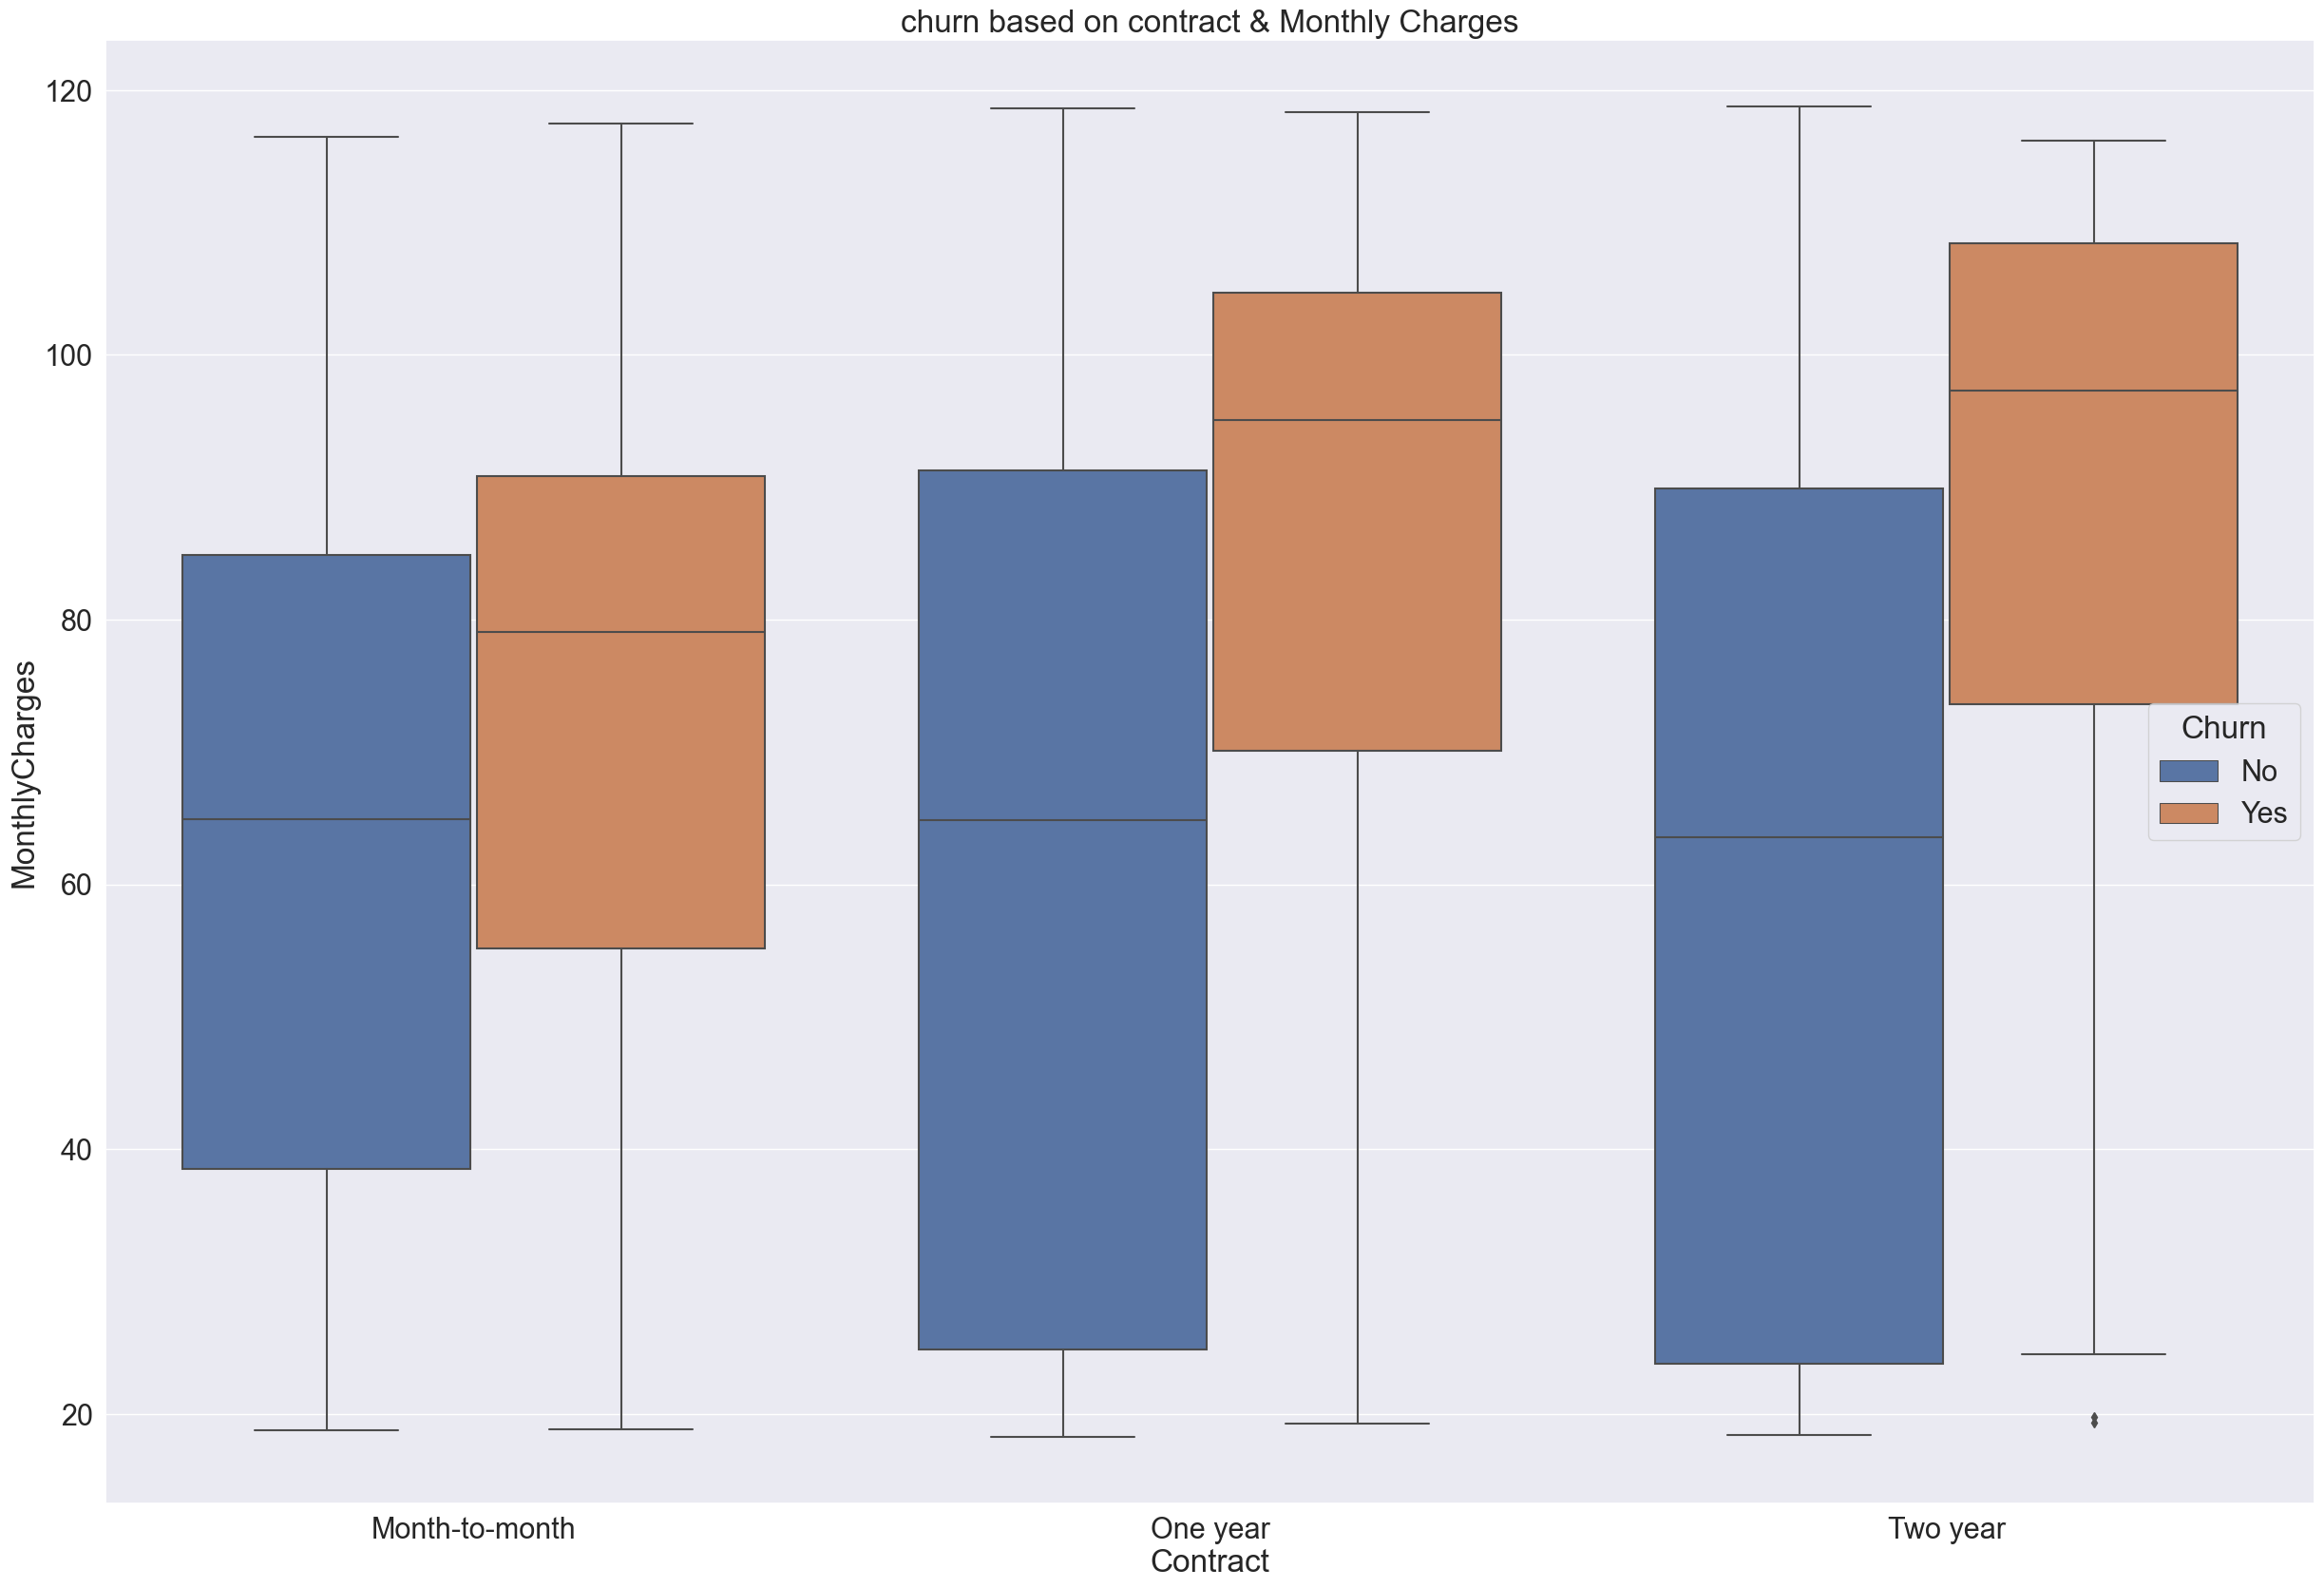

In [37]:
fig, ax = plt.subplots(figsize=(30, 20))
sns.boxplot(data=df,x="Contract",y="MonthlyCharges",hue="Churn")
plt.title("churn based on contract & Monthly Charges")
plt.show()

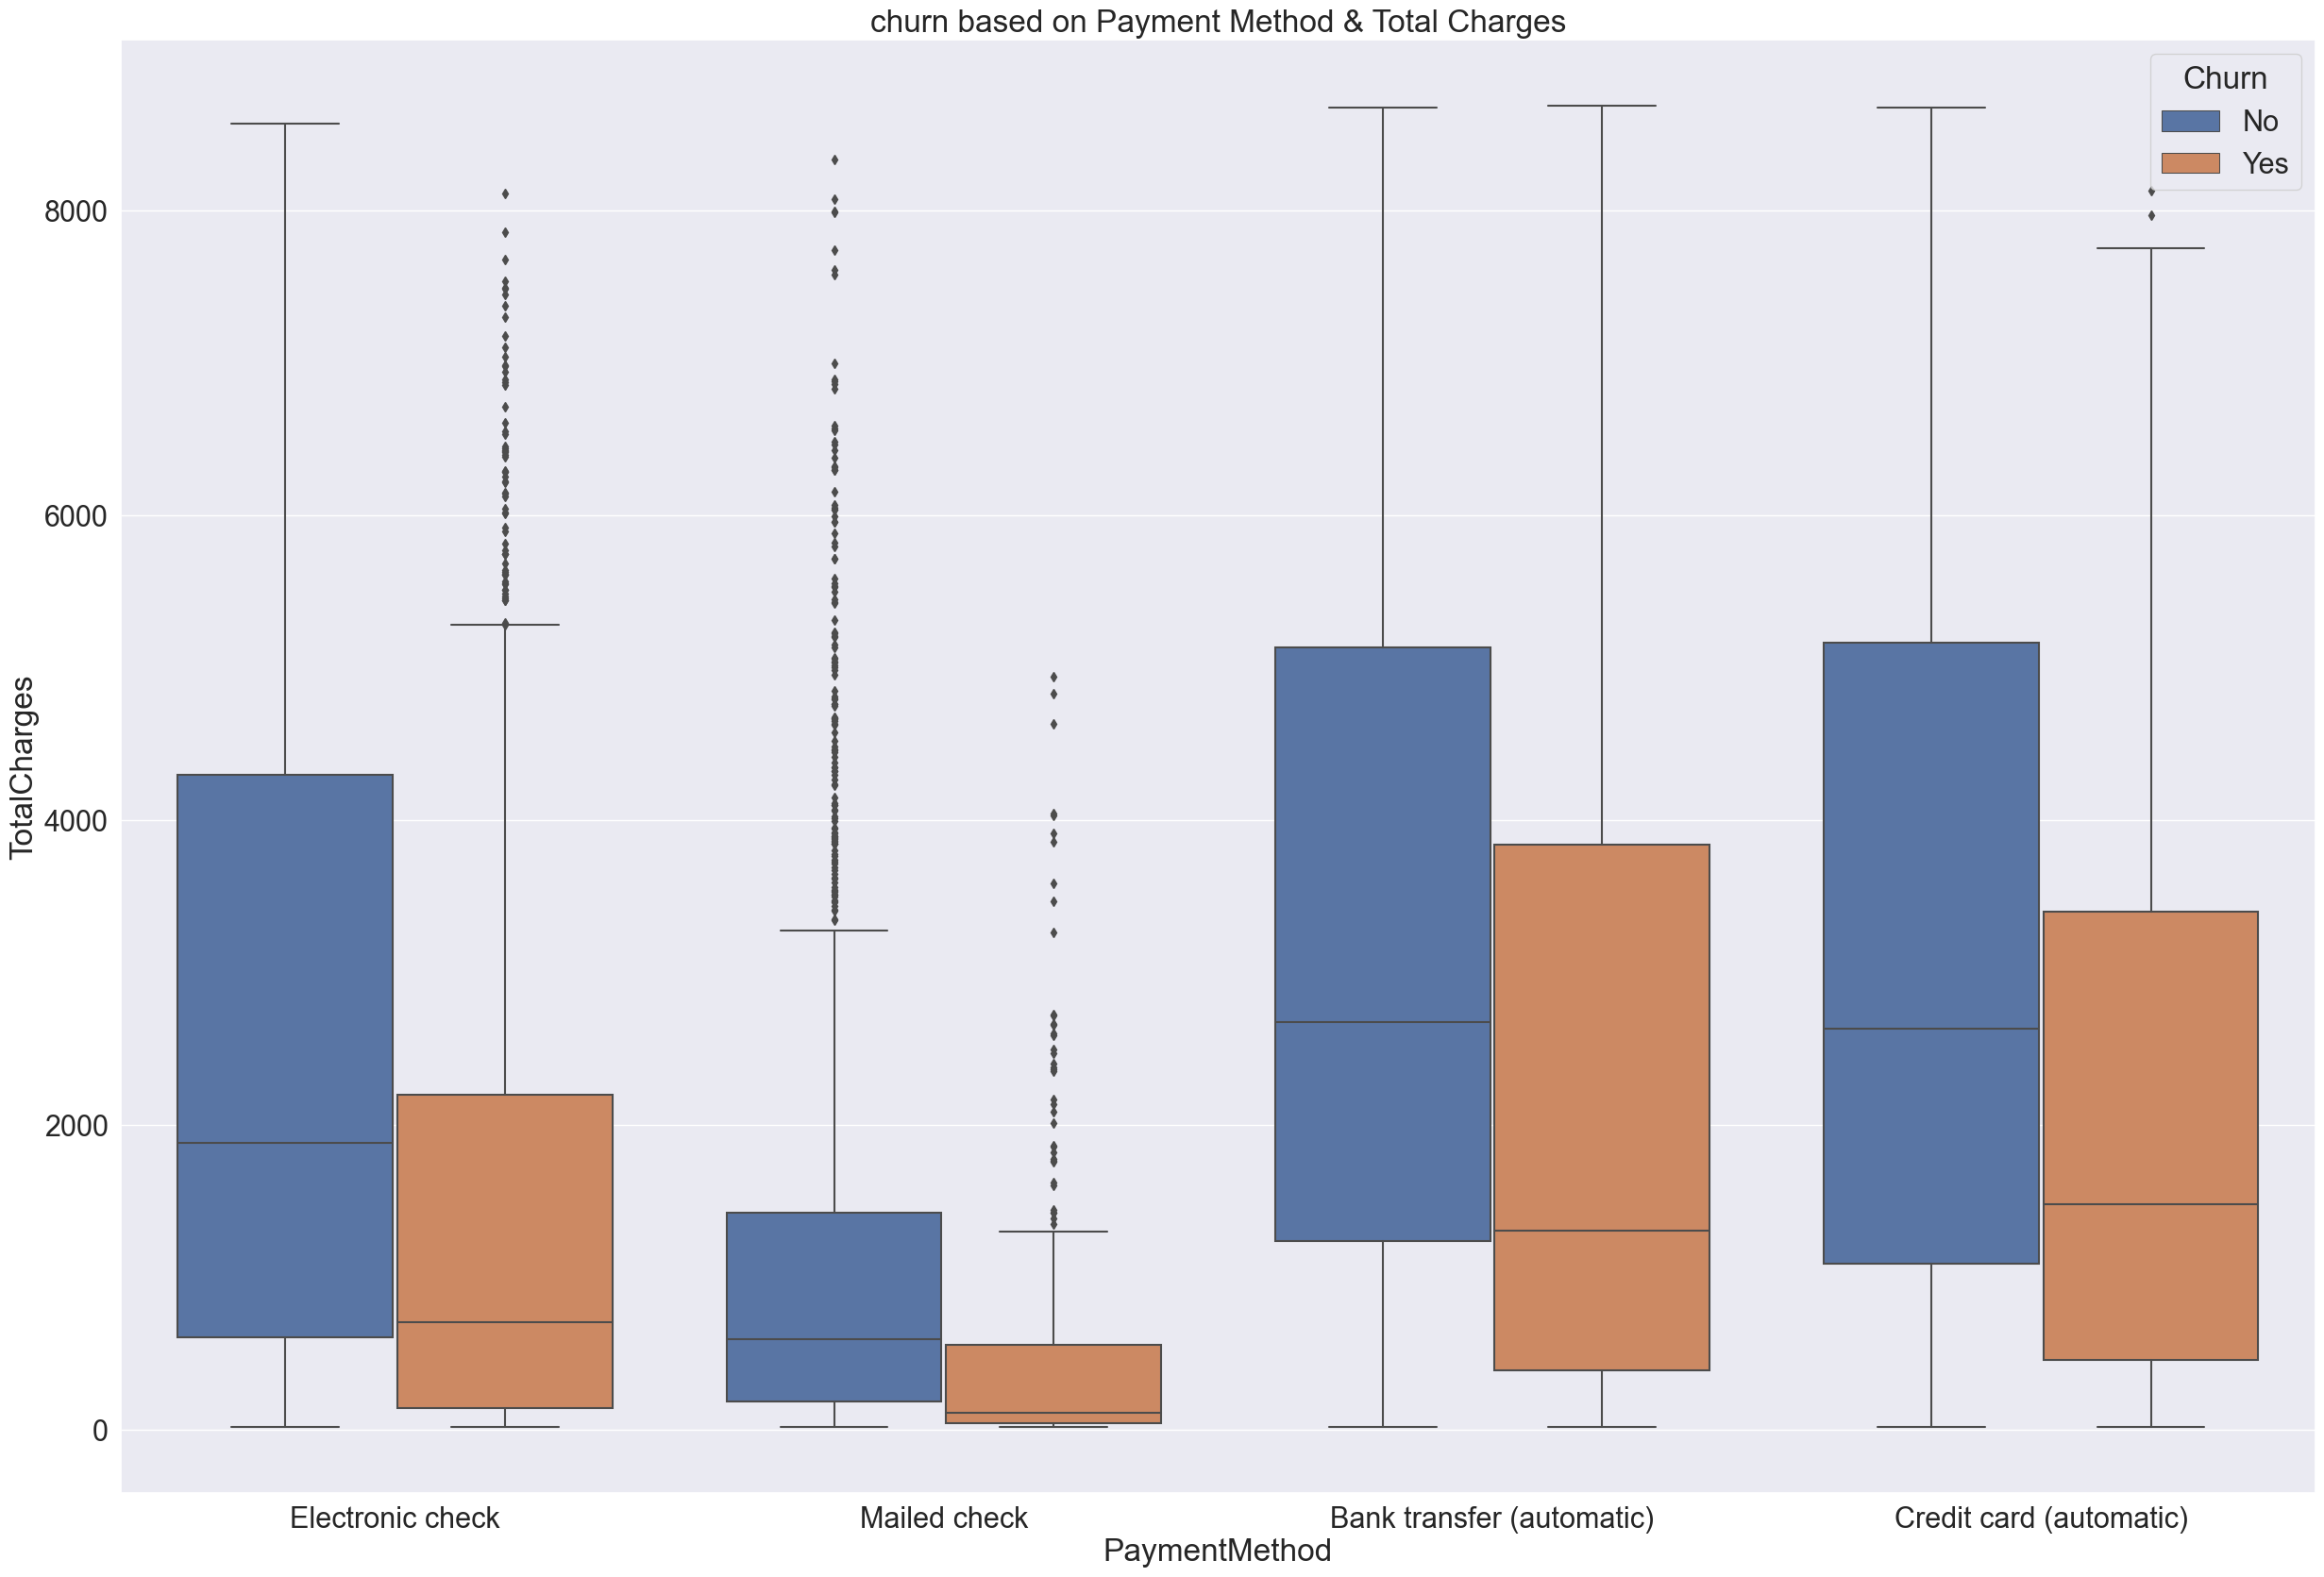

In [38]:
fig, ax = plt.subplots(figsize=(30, 20))
sns.boxplot(data=df,x="PaymentMethod",y="TotalCharges",hue="Churn")
plt.title("churn based on Payment Method & Total Charges")
plt.show()

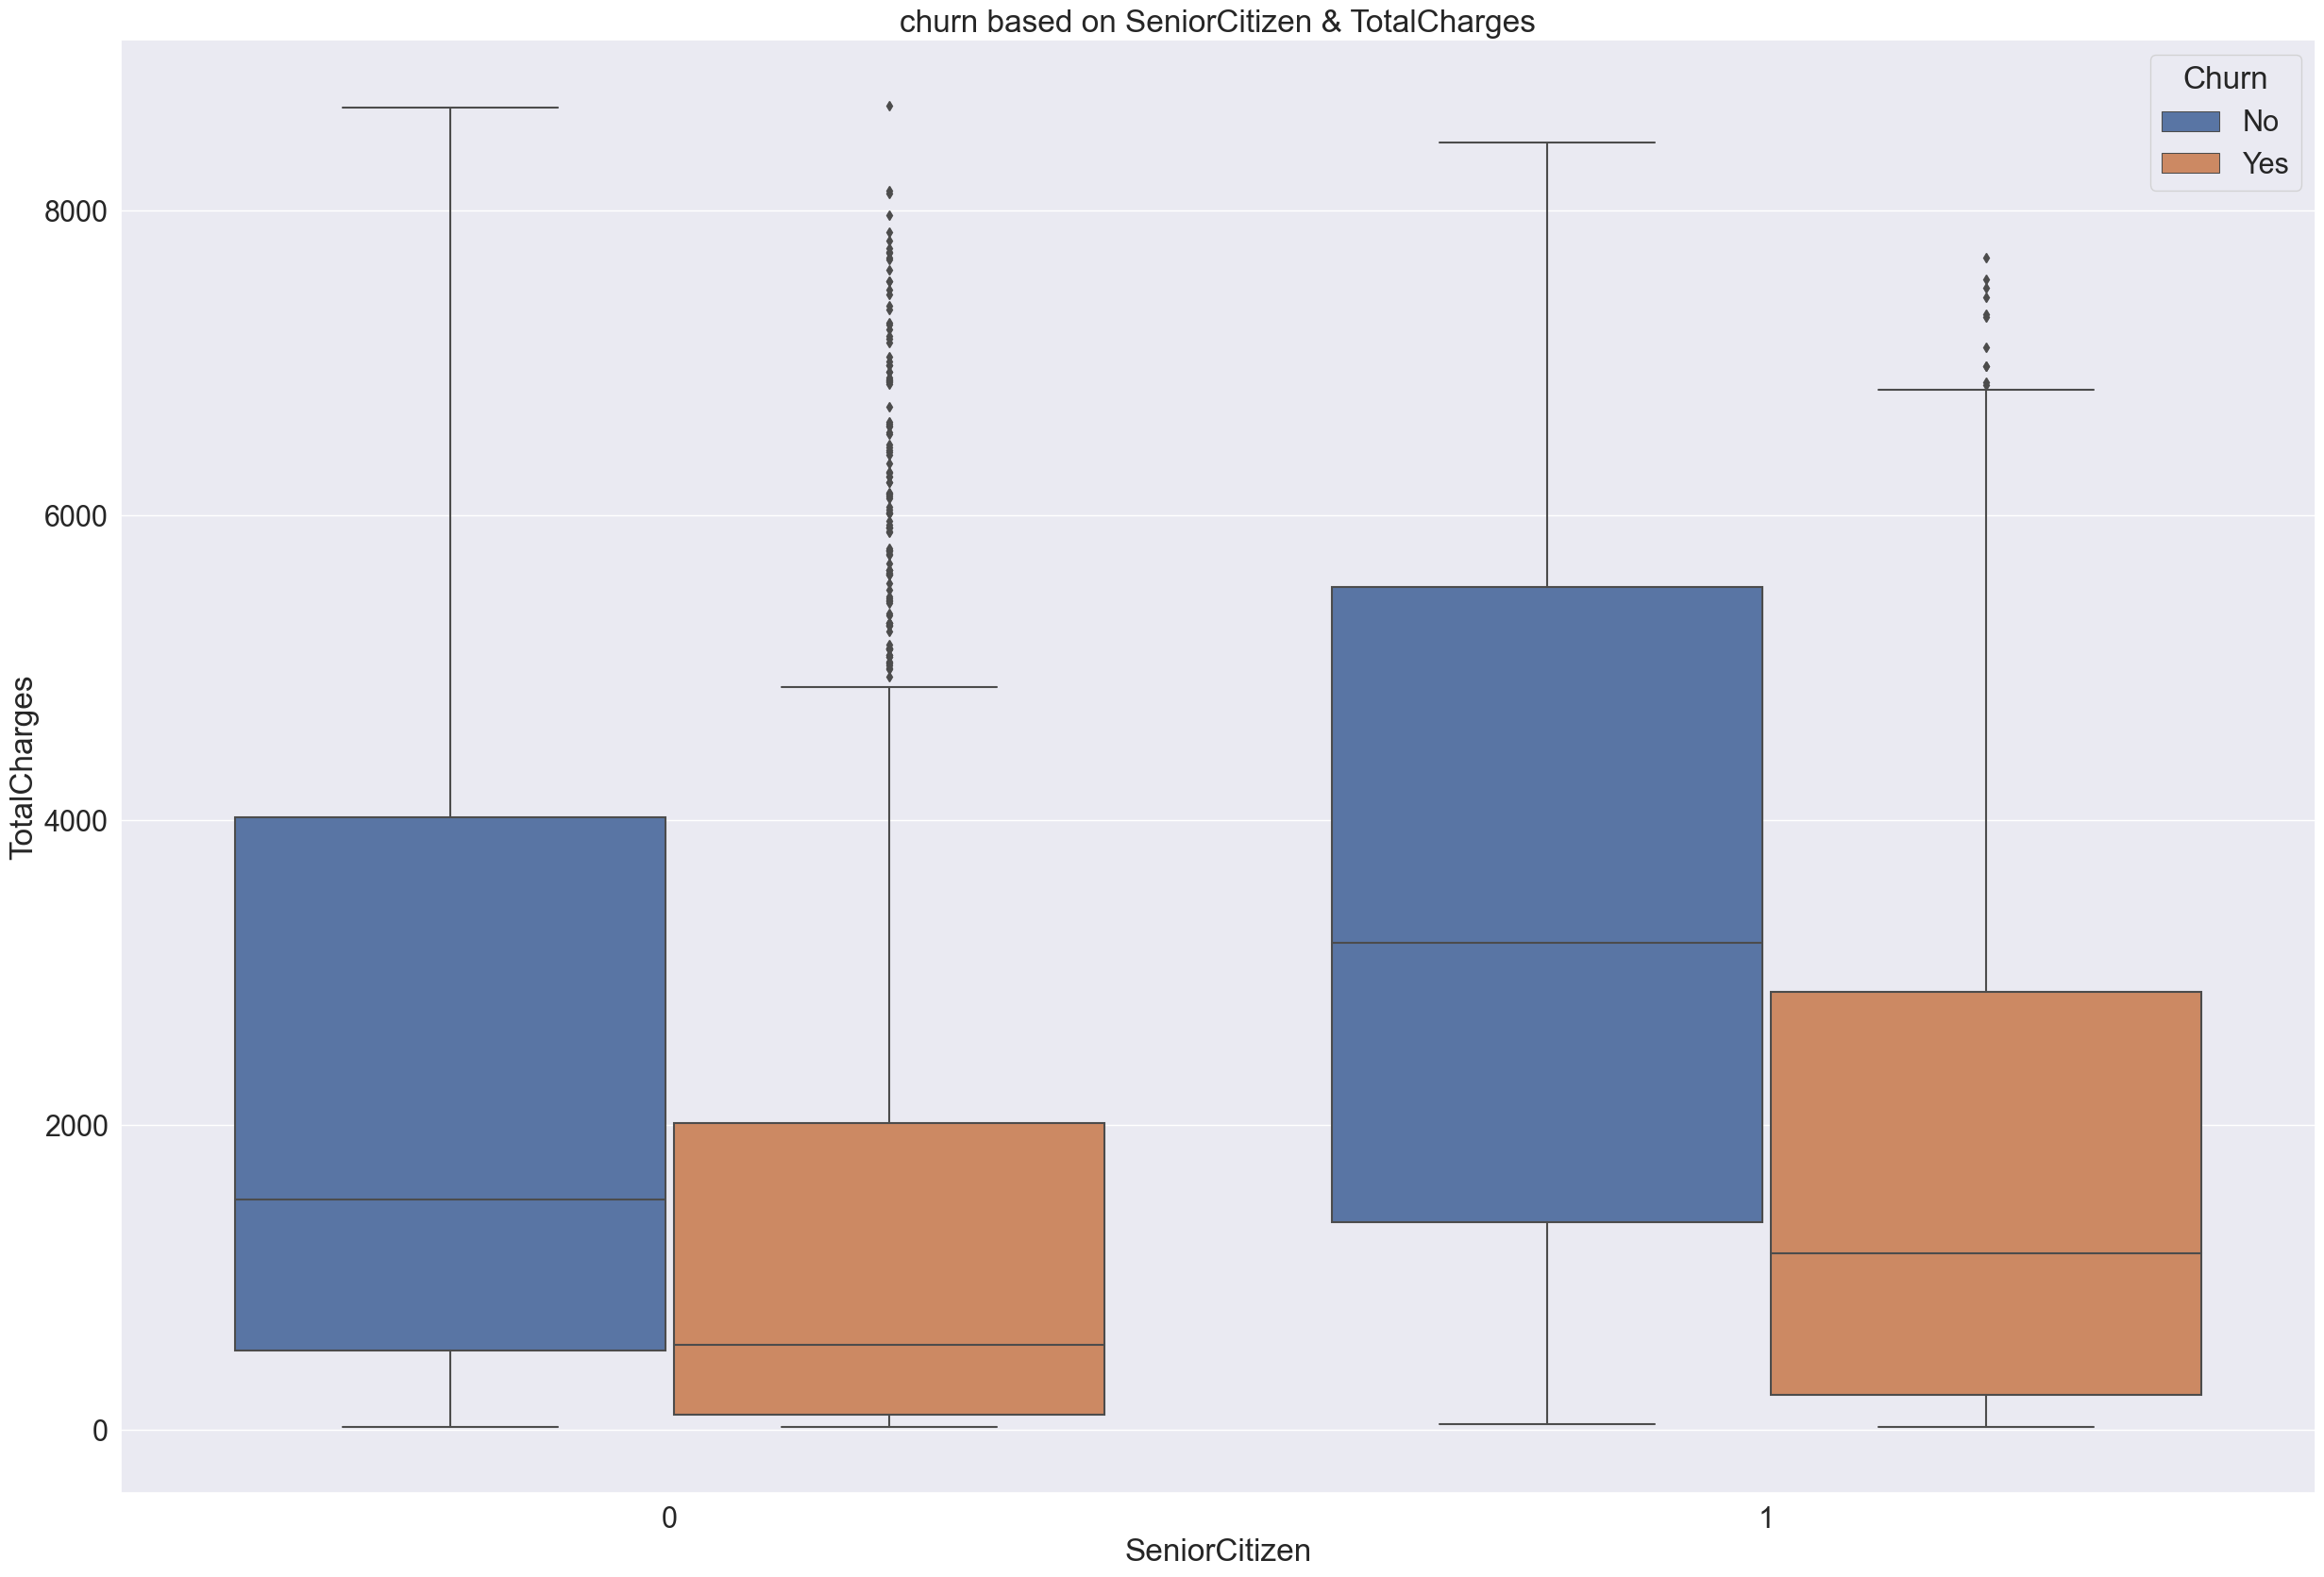

In [39]:
fig, ax = plt.subplots(figsize=(30, 20))
sns.boxplot(data=df,x="SeniorCitizen",y="TotalCharges",hue="Churn")
plt.title("churn based on SeniorCitizen & TotalCharges")
plt.show()

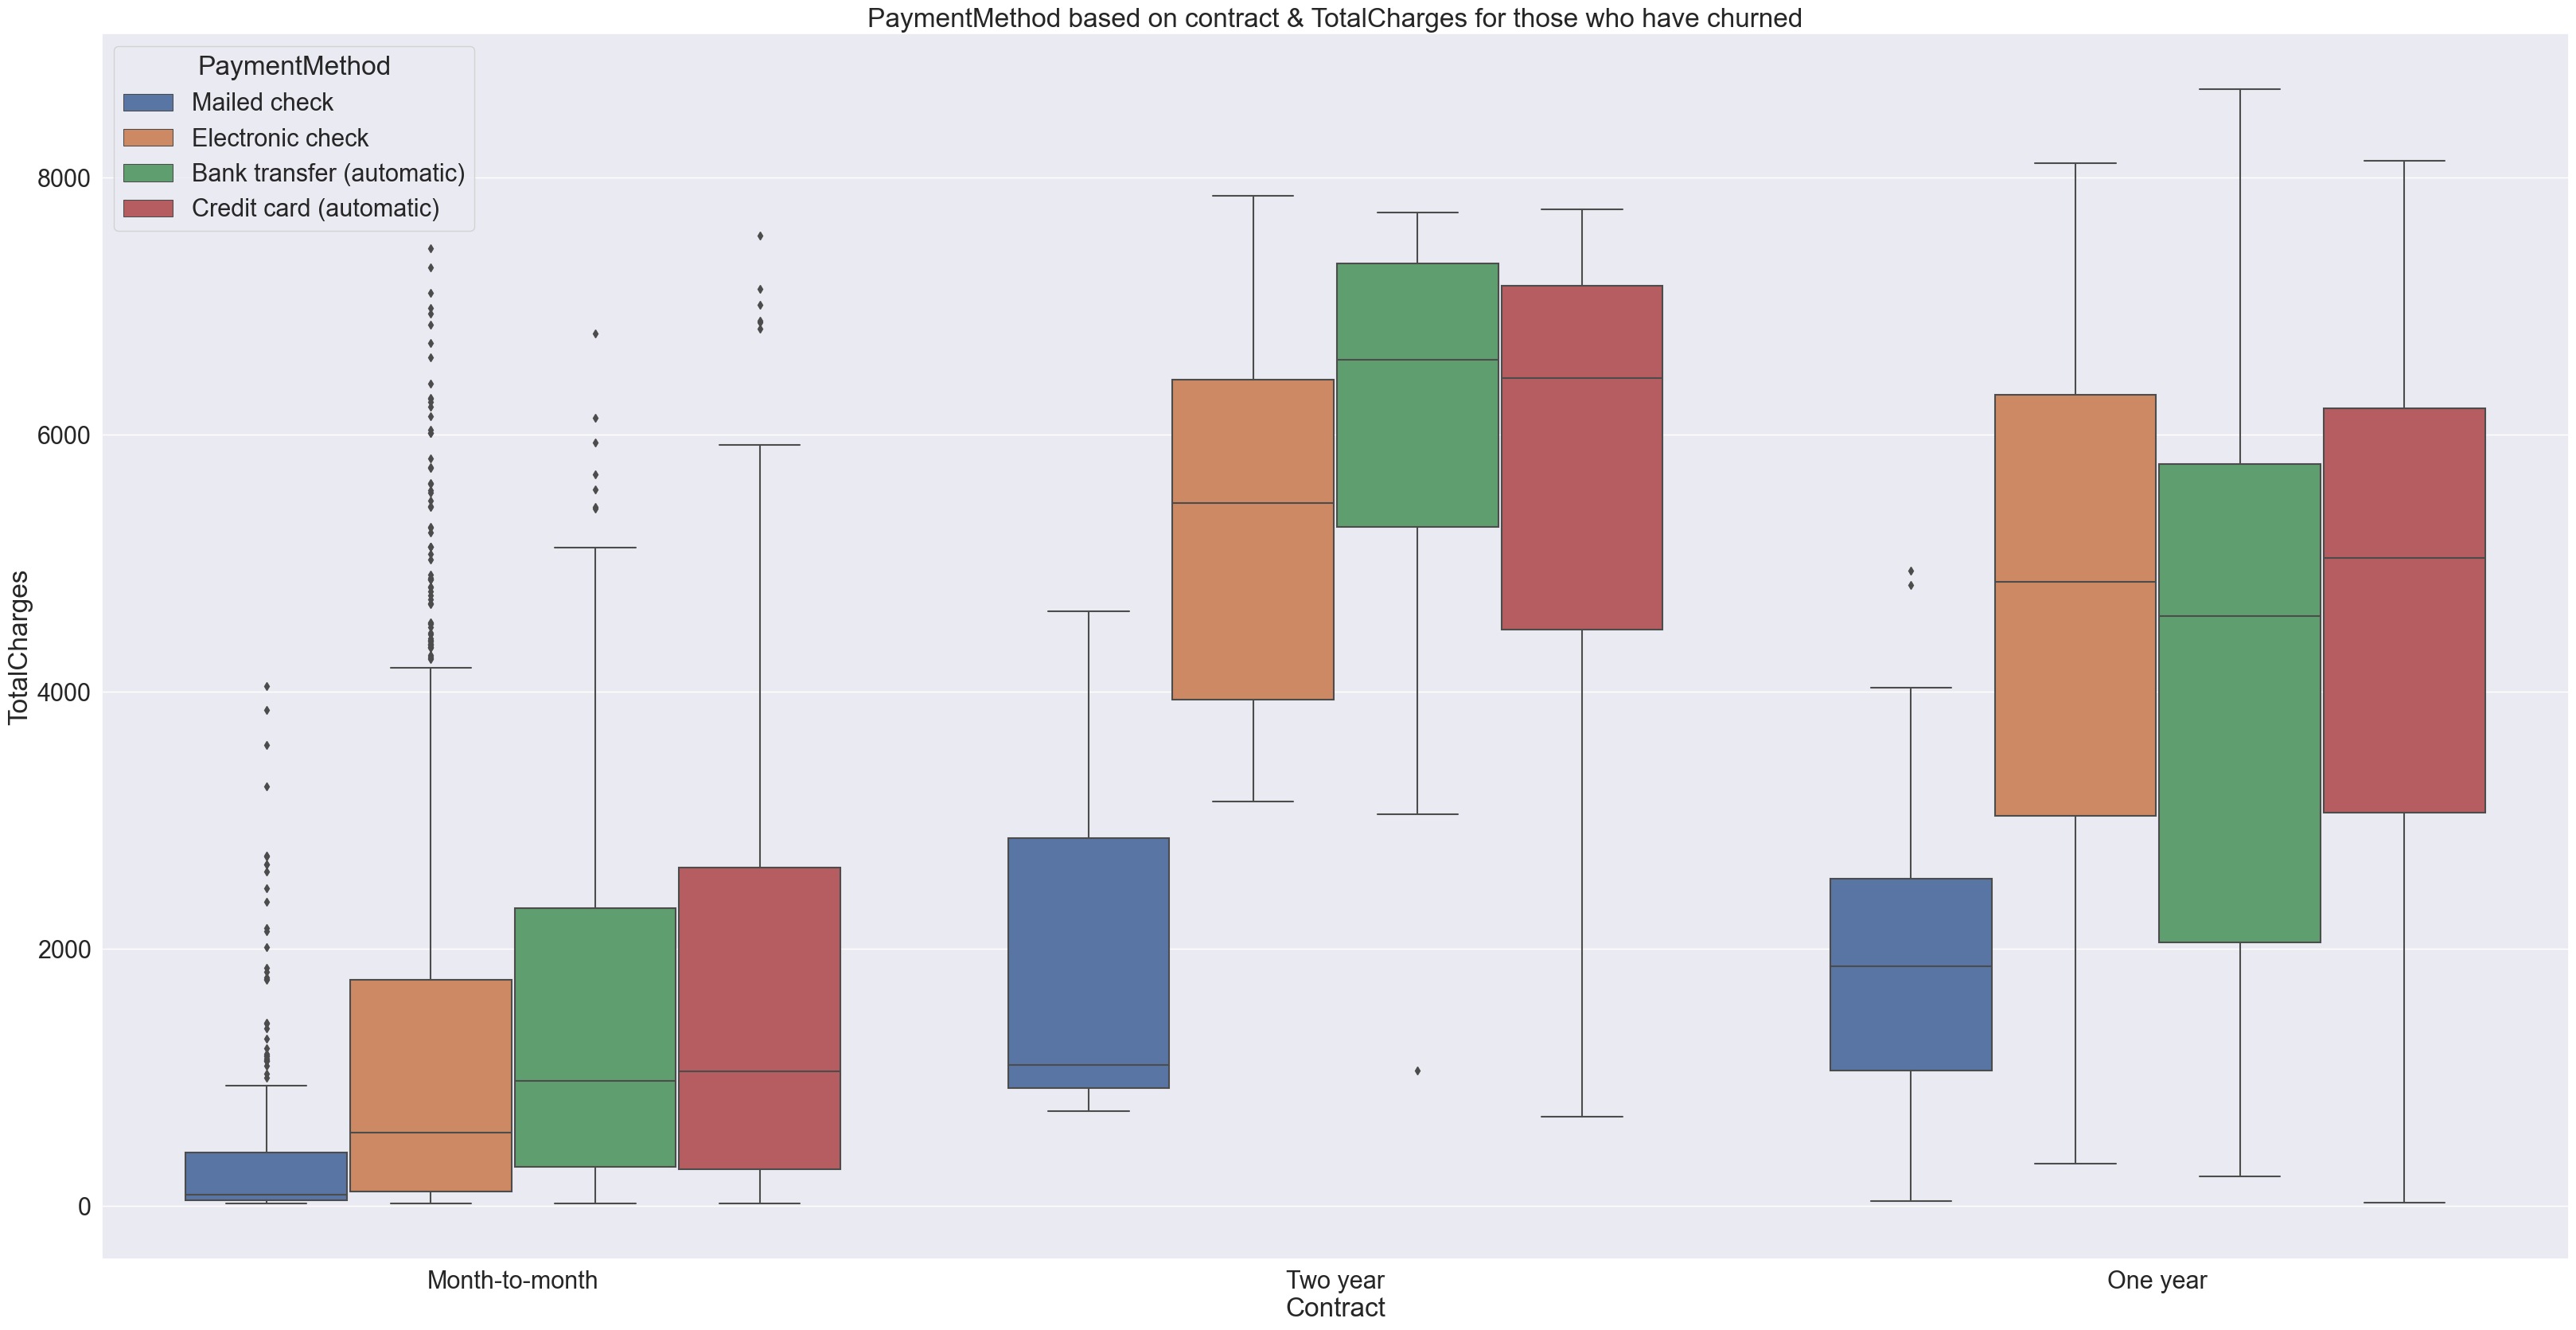

In [40]:
df_churn = df[df['Churn']=='Yes']
fig, ax = plt.subplots(figsize=(40, 20))
sns.boxplot(data=df_churn,x="Contract",y="TotalCharges",hue="PaymentMethod")
plt.title("PaymentMethod based on contract & TotalCharges for those who have churned")
plt.show()

##### 2. Let us visualise **Q-Q plot** for few attributes

<Figure size 1000x600 with 0 Axes>

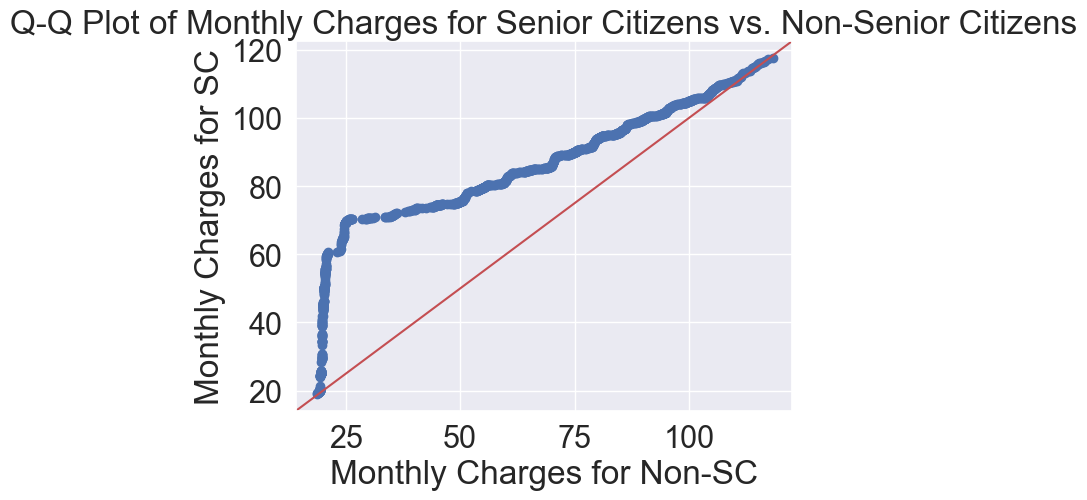

In [41]:
# Define SC and non-SC subsets
sc_customers = telecom[telecom['SeniorCitizen'] == 1]
non_sc_customers = telecom[telecom['SeniorCitizen'] == 0]
plt.figure(figsize=(10, 6))
# Q-Q plot for senior citizens' monthly charges vs. non-senior citizens' monthly charges
sm.qqplot_2samples(np.sort(sc_customers['MonthlyCharges']), np.sort(non_sc_customers['MonthlyCharges']),
                   line='45', xlabel='Monthly Charges for SC', ylabel='Monthly Charges for Non-SC')
plt.title('Q-Q Plot of Monthly Charges for Senior Citizens vs. Non-Senior Citizens')
plt.show()


##### Let us verify the above distribution

In [42]:
# Assuming df is your DataFrame
month_sc = df['MonthlyCharges'][df['SeniorCitizen'] == 1]
month_nsc = df['MonthlyCharges'][df['SeniorCitizen'] == 0]

# Descriptive statistics for Senior Citizens
print("Descriptive Statistics for Senior Citizens:")
print(month_sc.describe())

# Descriptive statistics for Non-Senior Citizens
print("\nDescriptive Statistics for Non-Senior Citizens:")
print(month_nsc.describe())

Descriptive Statistics for Senior Citizens:
count    1142.000000
mean       79.820359
std        23.764027
min        18.950000
25%        70.150000
50%        84.850000
75%        98.075000
max       117.450000
Name: MonthlyCharges, dtype: float64

Descriptive Statistics for Non-Senior Citizens:
count    5890.000000
mean       61.885594
std        30.315567
min        18.250000
25%        25.600000
50%        65.875000
75%        86.787500
max       118.750000
Name: MonthlyCharges, dtype: float64


<Figure size 3000x2000 with 0 Axes>

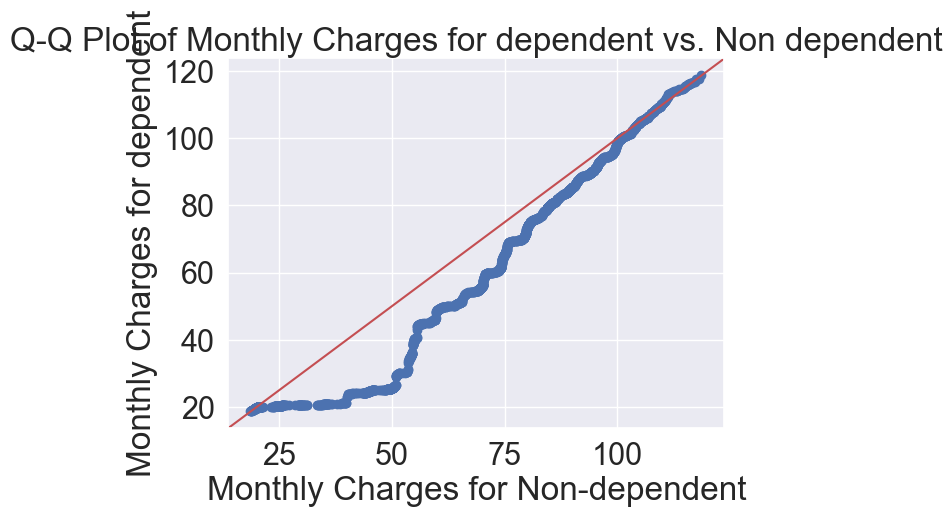

In [43]:
# Define dependent and non-dependent subsets
dependent_customers = telecom[telecom['Dependents'] == 1]
non_dependent_customers = telecom[telecom['Dependents'] == 0]
plt.figure(figsize=(30, 20))
# Q-Q plot for dependent monthly charges vs. non-dependent monthly charges
sm.qqplot_2samples(np.sort(dependent_customers['MonthlyCharges']), np.sort(non_dependent_customers['MonthlyCharges']),
                   line='45', xlabel='Monthly Charges for dependent', ylabel='Monthly Charges for Non-dependent')
plt.title('Q-Q Plot of Monthly Charges for dependent vs. Non dependent')
plt.show()


<Figure size 1000x600 with 0 Axes>

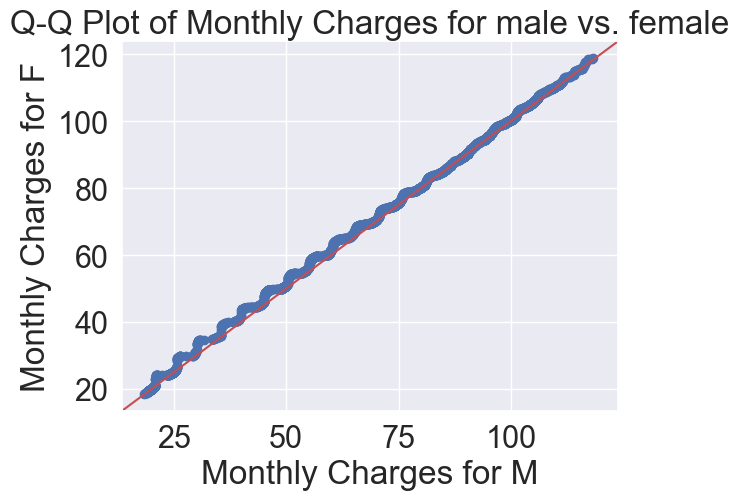

In [44]:
# Define male and female subsets
male_customers = telecom[telecom['gender'] == 'Male']
female_customers = telecom[telecom['gender'] == 'Female']
plt.figure(figsize=(10, 6))
# Q-Q plot for dependent monthly charges vs. non-dependent monthly charges
sm.qqplot_2samples(np.sort(male_customers['MonthlyCharges']), np.sort(female_customers['MonthlyCharges']),
                   line='45', xlabel='Monthly Charges for M', ylabel='Monthly Charges for F')
plt.title('Q-Q Plot of Monthly Charges for male vs. female')
plt.show()


##### 3. Let us plot **scatter plot**

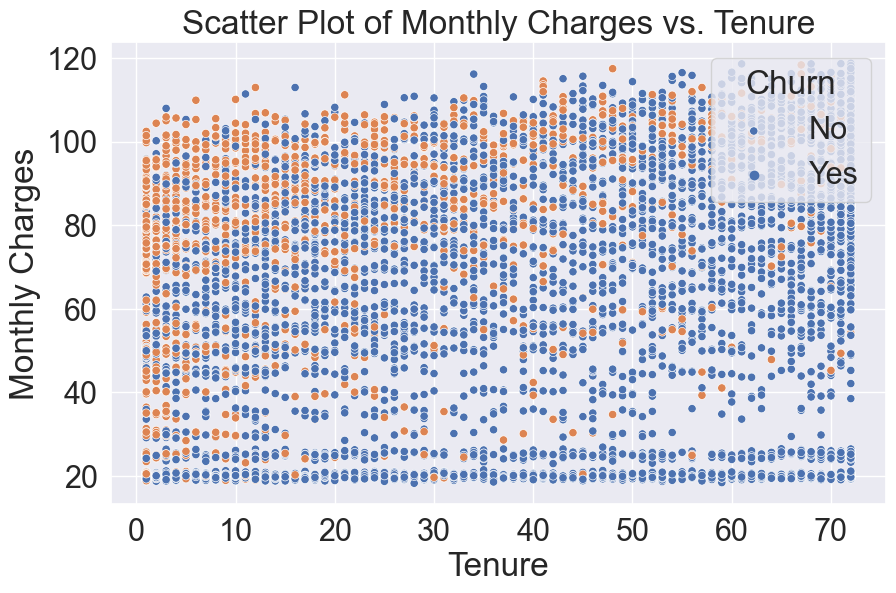

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=telecom, x='tenure', y='MonthlyCharges', hue=df['Churn'])
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.title('Scatter Plot of Monthly Charges vs. Tenure')
plt.legend(title='Churn', loc='upper right', labels=['No', 'Yes'])
plt.show()


#### Observation
There is no correlation between the two features

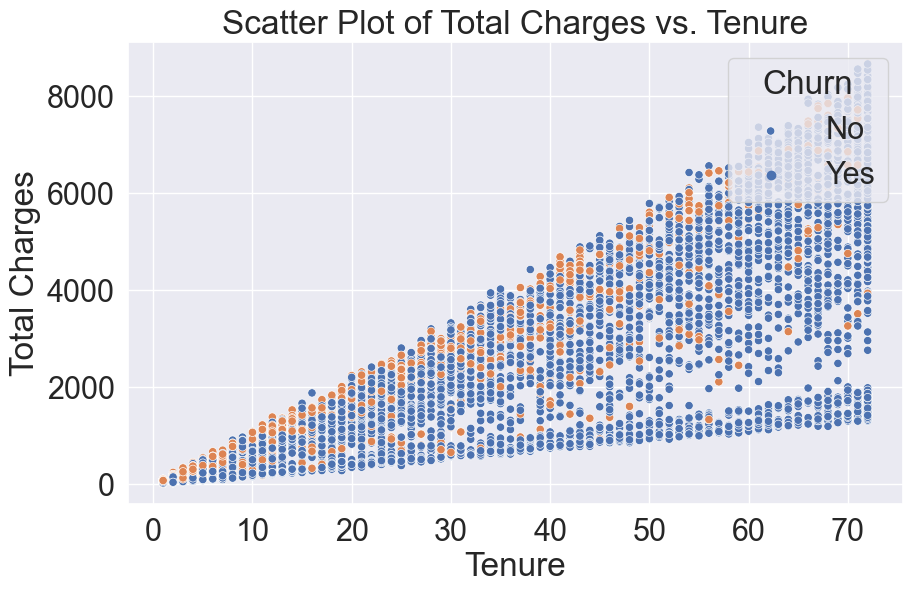

In [46]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=telecom, x='tenure', y='TotalCharges', hue=df['Churn'])
plt.xlabel('Tenure')
plt.ylabel('Total Charges')
plt.title('Scatter Plot of Total Charges vs. Tenure')
plt.legend(title='Churn', loc='upper right', labels=['No', 'Yes'])
plt.show()


#### Observation
There is positive correlation between the two features

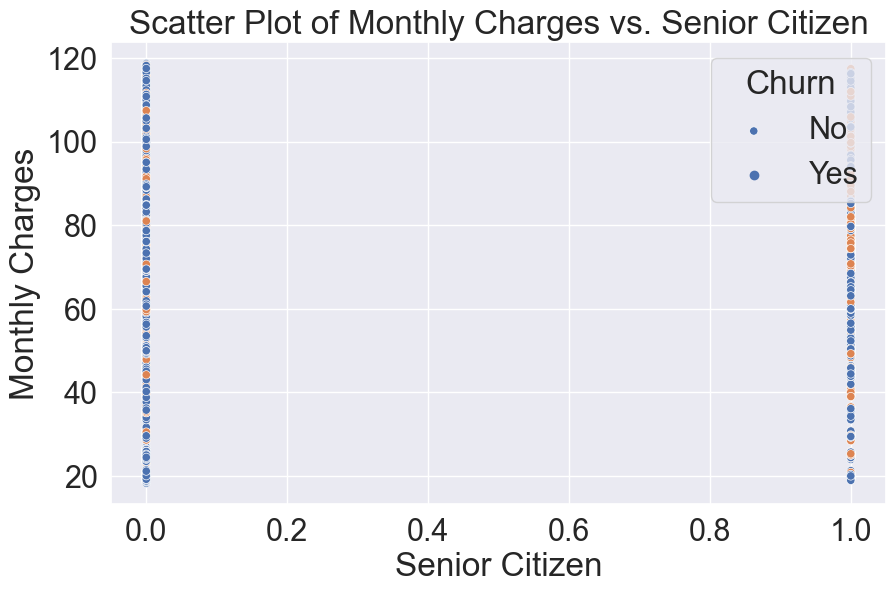

In [47]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=telecom, x='SeniorCitizen', y='MonthlyCharges', hue=df['Churn'])
plt.xlabel('Senior Citizen')
plt.ylabel('Monthly Charges')
plt.title('Scatter Plot of Monthly Charges vs. Senior Citizen')
plt.legend(title='Churn', loc='upper right', labels=['No', 'Yes'])
plt.show()


#### Let us performe  chi-squared test between categorical variables with respect to the 'Churn' variable

**Internet Service v/s Churn**

In [48]:
contingency_table = pd.crosstab(df['InternetService'], df['Churn'])
contingency_table

Churn              No   Yes
InternetService            
DSL              1957   459
Fiber optic      1799  1297
No               1407   113

**Interpret the Results:**

- The chi2 value is the chi-squared statistic.
- The p value is the p-value associated with the test.
- The dof value is the degrees of freedom.
- The expected value contains the expected frequencies under the null hypothesis.

In [49]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared statistic: {chi2}\n")
print("Expected frequencies:")
print(expected)


Chi-squared statistic: 728.6956143058694

Expected frequencies:
[[1773.86348123  642.13651877]
 [2273.12969283  822.87030717]
 [1116.00682594  403.99317406]]


Let us check the p-value to determine whether there is a statistically significant relationship between the variables.

In [50]:
alpha = 0.05
print(f"P-value: {p}")
if p < alpha:
    print("Reject the null hypothesis. There is a significant relationship between variables.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between variables.")


P-value: 5.831198962237274e-159
Reject the null hypothesis. There is a significant relationship between variables.


**Gender v/s Churn**

In [51]:
contingency_table = pd.crosstab(df['gender'], df['Churn'])
contingency_table

Churn     No  Yes
gender           
Female  2544  939
Male    2619  930

In [52]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared statistic: {chi2}\n")
print(f"P-value: {p}\n")
print("Expected frequencies:")
print(expected)

Chi-squared statistic: 0.47545453727386294

P-value: 0.4904884707065509

Expected frequencies:
[[2557.27090444  925.72909556]
 [2605.72909556  943.27090444]]


Observation - No relation between churn and gender attributes

**Paperless Billing v/s Churn**

In [53]:
contingency_table = pd.crosstab(df['PaperlessBilling'], df['Churn'])
contingency_table

Churn               No   Yes
PaperlessBilling            
No                2395   469
Yes               2768  1400

In [54]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared statistic: {chi2}\n")
print(f"P-value: {p}\n")
print("Expected frequencies:")
print(expected)

Chi-squared statistic: 256.87490836218717

P-value: 8.236203353962564e-58

Expected frequencies:
[[2102.79180887  761.20819113]
 [3060.20819113 1107.79180887]]


Observation - There seems to be a relation between the two attributes

**Payment Method v/s Churn**

In [55]:
contingency_table = pd.crosstab(df['PaymentMethod'], df['Churn'])
contingency_table

Churn                        No   Yes
PaymentMethod                        
Bank transfer (automatic)  1284   258
Credit card (automatic)    1289   232
Electronic check           1294  1071
Mailed check               1296   308

In [56]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared statistic: {chi2}\n")
print(f"P-value: {p}\n")
print("Expected frequencies:")
print(expected)

Chi-squared statistic: 645.4299001234638

P-value: 1.4263098511063342e-139

Expected frequencies:
[[1132.15955631  409.84044369]
 [1116.74104096  404.25895904]
 [1736.41851536  628.58148464]
 [1177.68088737  426.31911263]]


Obsrevattion- We reject the null hypothesis as there is a significant relationship between variables.

**Contract v/s Churn**

In [57]:
contingency_table = pd.crosstab(df['Contract'], df['Churn'])
contingency_table

Churn             No   Yes
Contract                  
Month-to-month  2220  1655
One year        1306   166
Two year        1637    48

In [58]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared statistic: {chi2}\n")
print(f"P-value: {p}\n")
print("Expected frequencies:")
print(expected)

Chi-squared statistic: 1179.5458287339445

P-value: 7.326182186265472e-257

Expected frequencies:
[[2845.08319113 1029.91680887]
 [1080.76450512  391.23549488]
 [1237.15230375  447.84769625]]


Observation- There is significant relationship between the two attributes

#### Deeper Analysis of customers who churned ####

In [59]:
# Filtering  Churned Customers:
churning_customers = df[df['Churn'] == 'Yes']

In [60]:
def plot_churn_percentage_by_category(col):
    # Calculate the percentages of churn and no churn for the specified categorical column
    category_counts = df[col].value_counts()
    churning_customers_category = churning_customers[col].value_counts()

    churn_percentage = (churning_customers_category / category_counts) * 100
    no_churn_percentage = 100 - churn_percentage

    # Create a grouped bar chart
    plt.figure(figsize=(8, 6))
    bar_width = 0.35
    index = range(len(category_counts))

    plt.bar(index, churn_percentage, bar_width, label='Churn', color='red')
    plt.bar([i + bar_width for i in index], no_churn_percentage, bar_width, label='No Churn', color='green')
    plt.xlabel(col)
    plt.ylabel('Percentage')
    plt.title(f'Percentage of Churning and Non-Churning Customers by {col}')
    plt.xticks([i + bar_width / 2 for i in index], category_counts.index)
    plt.legend()
    plt.show()


In [61]:
def plot_category_percentage_among_churn(col):
    # Calculate the percentages of churn among different categories for the specified categorical column
    churn_percentage = (churning_customers[col].value_counts() / len(churning_customers)) * 100

    # Create a bar chart
    # plt.figure(figsize=(8, 6))
    index = range(len(churn_percentage))

    plt.bar(index, churn_percentage)
    plt.xlabel(col)
    plt.ylabel('% of Churned Customers')
    plt.title(f'% of Churning Customers by {col}')
    plt.xticks(index, churn_percentage.index)
    plt.show()


In [62]:
def plot_churn_distribution_pie(col):
    # Count the number of churning customers by the specified categorical column
    category_counts = df[col].value_counts()
    churning_customers_category = churning_customers[col].value_counts()

    # Create a pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(churning_customers_category, labels=churning_customers_category.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Churning Customers by {col}')
    plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
    plt.show()

In [63]:
def plot_boxplot(x_col, y_col):
    plt.figure(figsize=(10, 6))
    sns.set(font_scale=2)
    sns.boxplot(data=df, x=x_col, y=y_col)
    plt.title(f'{y_col} vs. {x_col}', fontsize=30)
    plt.show()

In [64]:
def plot_percentage_cross_distribution(df, category_col1, category_col2):
    # Create a crosstab to calculate percentages
    cross_tab = pd.crosstab(df[category_col1], df[category_col2], normalize='index') * 100

    # Reshape the data for the side-by-side bar plot
    cross_tab = cross_tab.reset_index()
    cross_tab = pd.melt(cross_tab, id_vars=category_col1, var_name=category_col2, value_name='Percentage')

    # Create a side-by-side bar plot for percentages
    plt.figure(figsize=(10, 6))
    sns.barplot(data=cross_tab, x=category_col1, y='Percentage', hue=category_col2, palette=['blue', 'orange'])
    plt.xlabel(category_col1)
    plt.ylabel('Percentage')
    plt.title(f'Percentage Distribution of {category_col1} Among Customers by {category_col2}')
    plt.legend(title=category_col2, loc='upper right')
    plt.xticks(rotation=45)
    plt.show()

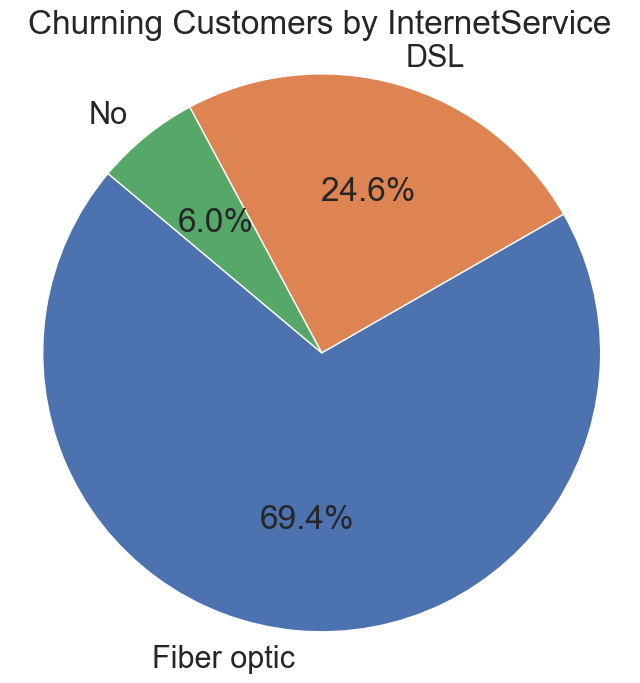

In [65]:
plot_churn_distribution_pie('InternetService')

**Observation**
- The majority of churned customers (almost 70%) are using Fiber Optic internet service.
- It could be due to factors such as low speed or reliability, or high pricing.

**Analysis wrt Billing**

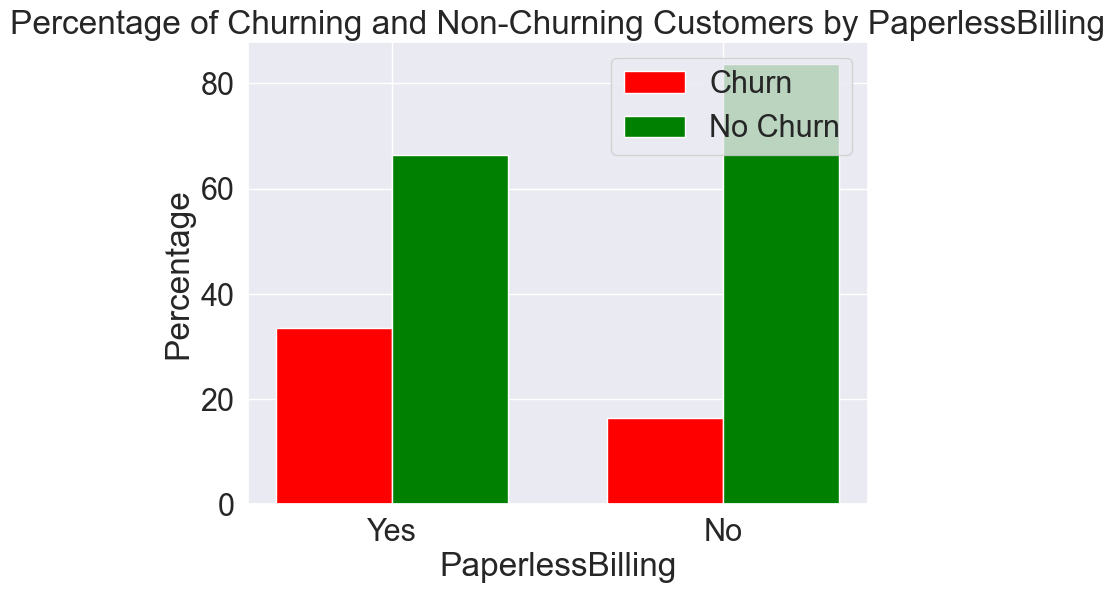

In [66]:
plot_churn_percentage_by_category('PaperlessBilling')

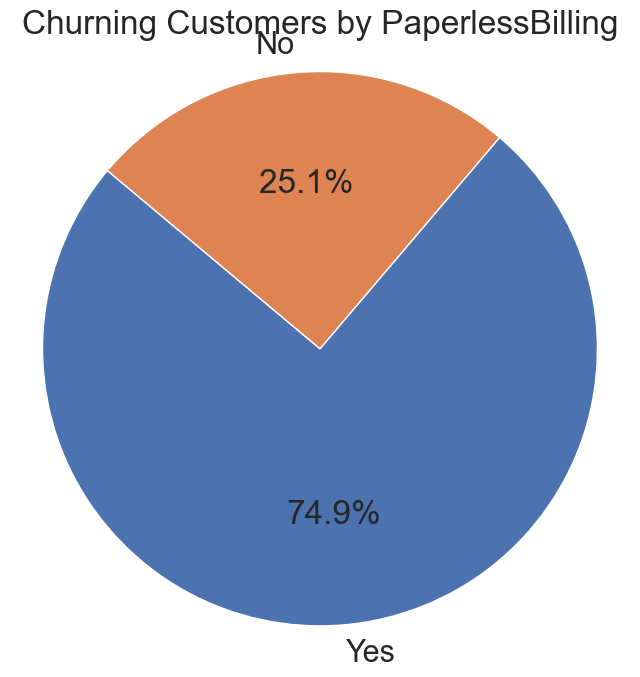

In [67]:
plot_churn_distribution_pie('PaperlessBilling')

**Observations:**
- 75 % of churned Customers had paperless billing

C:\Users\yashb\AppData\Local\Temp\ipykernel_17640\827609499.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churning_customers['MonthlyChargesBin'] = pd.cut(churning_customers['MonthlyCharges'], bins=bins)


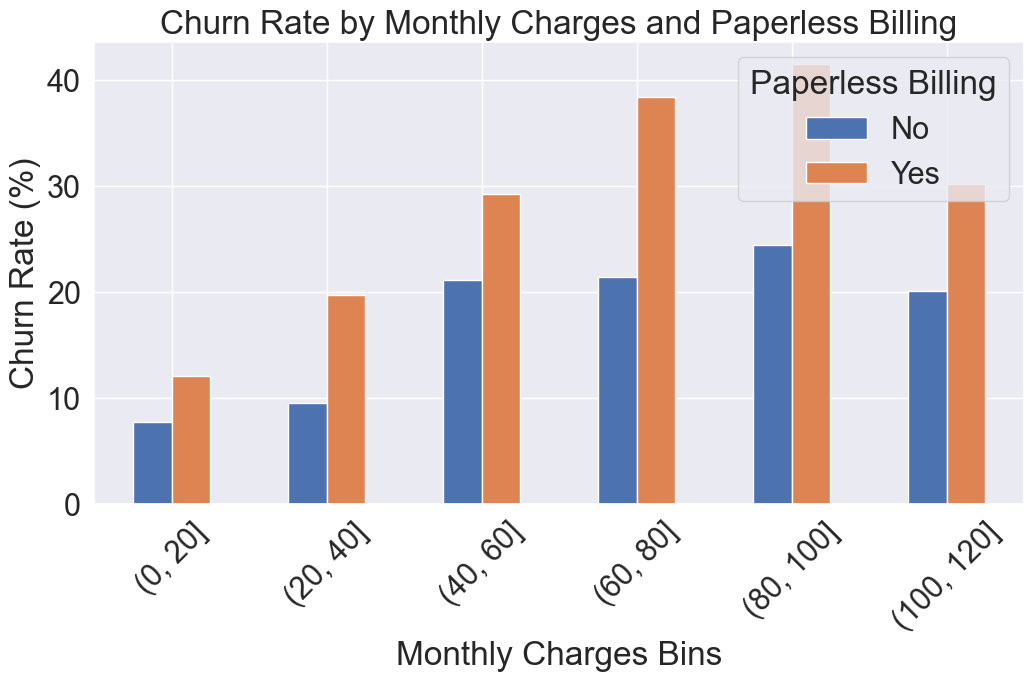

In [69]:
# Define the bins with a width of 20
bins = list(range(0, 121, 20))  # Bins from 0 to 200 with a width of 20

# Create a new column with bins
churning_customers['MonthlyChargesBin'] = pd.cut(churning_customers['MonthlyCharges'], bins=bins)

# Group data by MonthlyChargesBin and PaperlessBilling, and calculate churn rates
churn_rates = (
    churning_customers.groupby(['MonthlyChargesBin', 'PaperlessBilling'])
    .size()
    .unstack()
    .div(df.groupby(['MonthlyChargesBin', 'PaperlessBilling']).size().unstack(), axis=0)
    * 100
)

# Create side-by-side bar plots
churn_rates.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Monthly Charges Bins')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Monthly Charges and Paperless Billing')
plt.xticks(rotation=45)
plt.legend(title='Paperless Billing', loc='upper right', labels=['No', 'Yes'])
plt.show()


**Observation:**
- For customers with non paperless billing, the churn rate increases till monthly charge 40-60, and after that the relative difference observed is less
- For customers with paperless billing , the churn rate increses with increase in monthly charge

**Analysis wrt Charges**

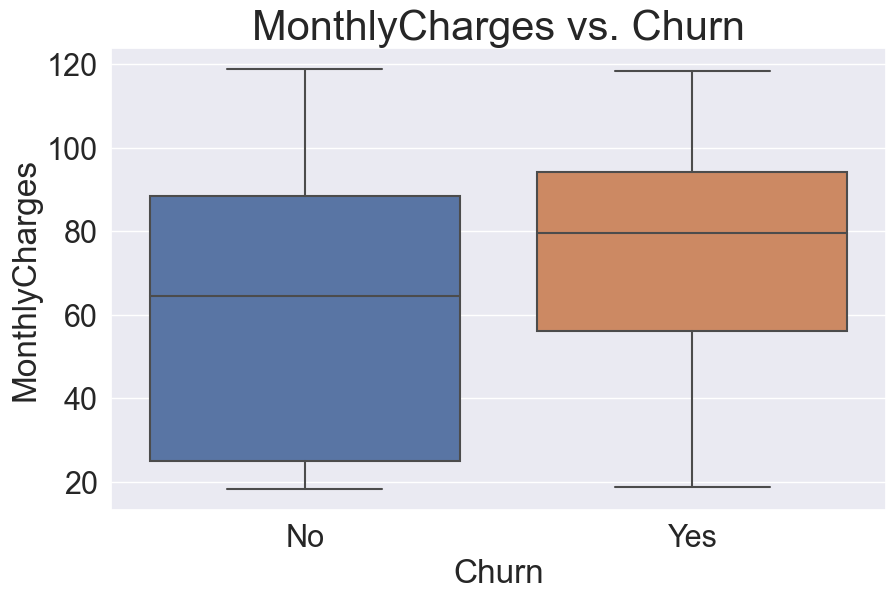

In [ ]:
plot_boxplot('Churn','MonthlyCharges')

Observation - Customers who churn are paying on average more amount per month than those who do not. 

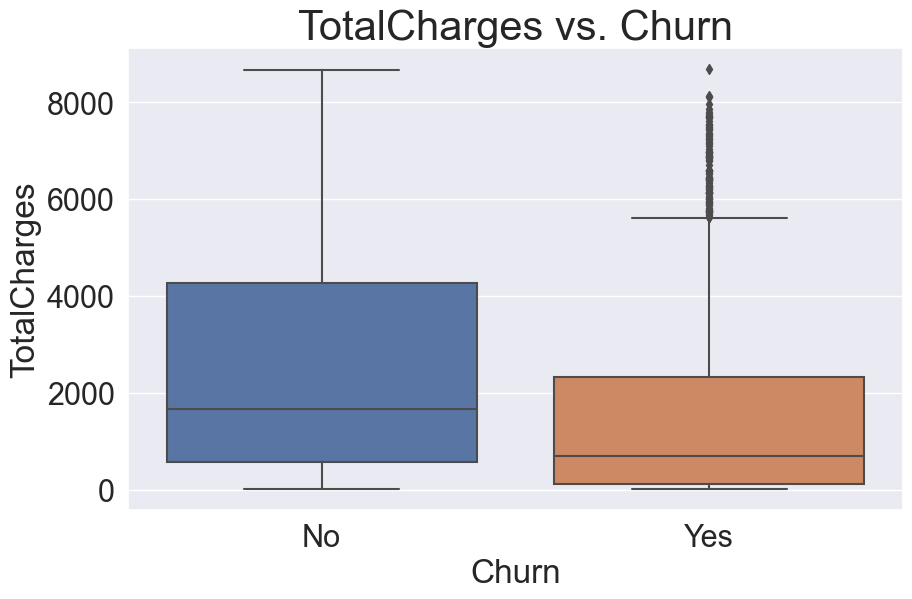

In [ ]:
plot_boxplot('Churn','TotalCharges')

Observation - Looking at total charges we can see that customers who churn seem to be paying higher monthly fees, but have a smaller amount of total charges before they churn.

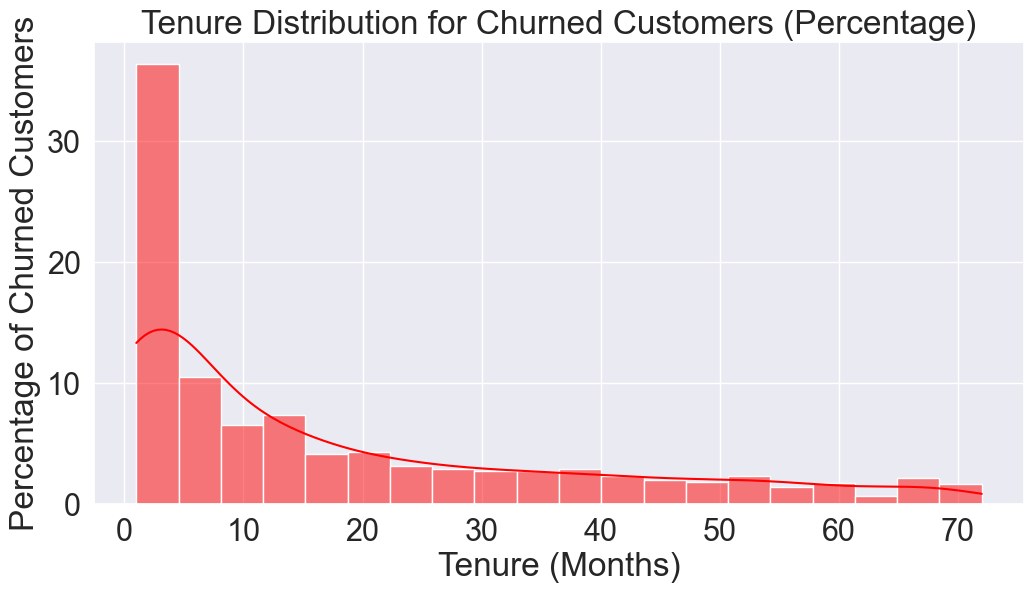

In [ ]:
# Calculate the percentage of customers in each tenure bin
tenure_counts = churning_customers['tenure'].value_counts(normalize=True) * 100

# Create a histogram plot for tenure percentages
plt.figure(figsize=(12, 6))
sns.histplot(data=churning_customers, x='tenure', bins=20, kde=True, color='red', stat='percent')
plt.xlabel('Tenure (Months)')
plt.ylabel('Percentage of Churned Customers')
plt.title('Tenure Distribution for Churned Customers (Percentage)')
plt.show()

Observation -  Tenure explains this by showing that the majority of churned customers are cancelling service within the first month before they accumlate large amounts of total fees.

**Analysis wrt Contract**

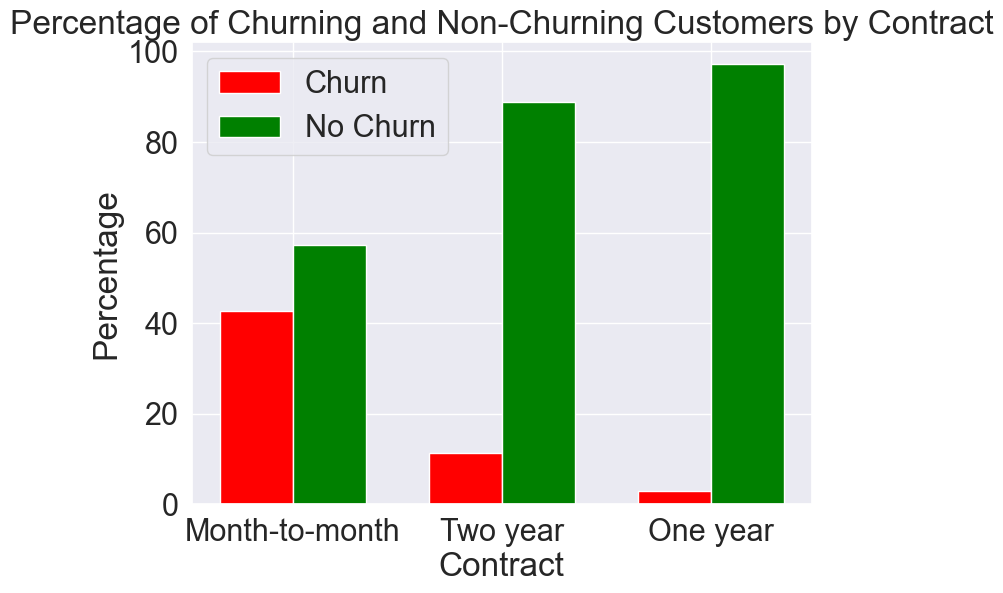

In [ ]:
plot_churn_percentage_by_category('Contract')

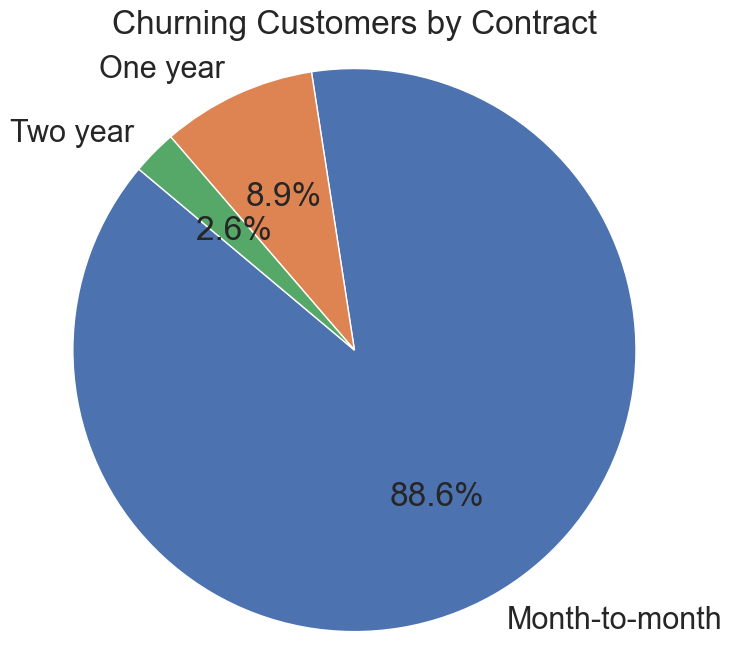

In [ ]:
plot_churn_distribution_pie('Contract')

**Observation:**
-  More customers churn on monthly plans
- The longer the plan, the lower the churn rate
- Customers with month-to-month contracts are not bound by long-term commitments, making it easier for them to switch providers.
- Therefore customers choose month-to-month contracts due to the flexibility it offers
- But Monthly contracts often lack incentives for customer loyalty. Customers may not have access to benefits or discounts that are typically offered to long-term contract subscribers.

**Analysis wrt Dependent**

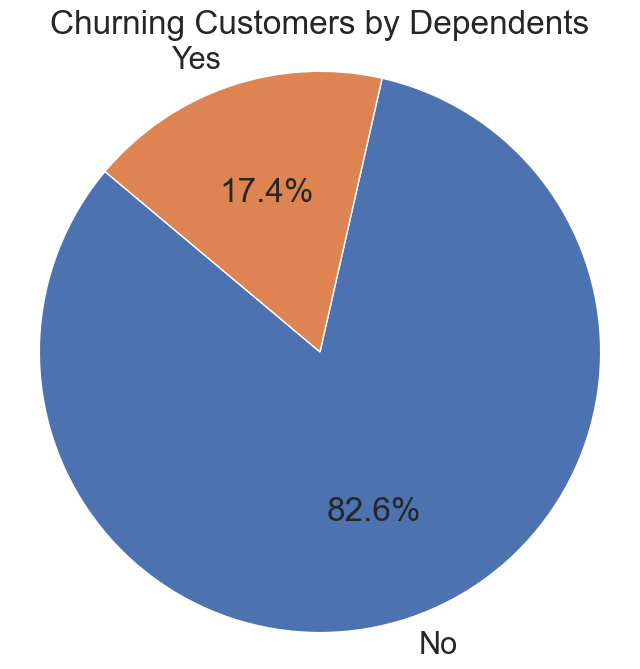

In [ ]:
plot_churn_distribution_pie('Dependents')

**Observation:**
-  Families often bundle their telecom services, including internet, TV, and phone, into a single package. This bundling can offer cost savings and convenience, making it less attractive for customers to churn.

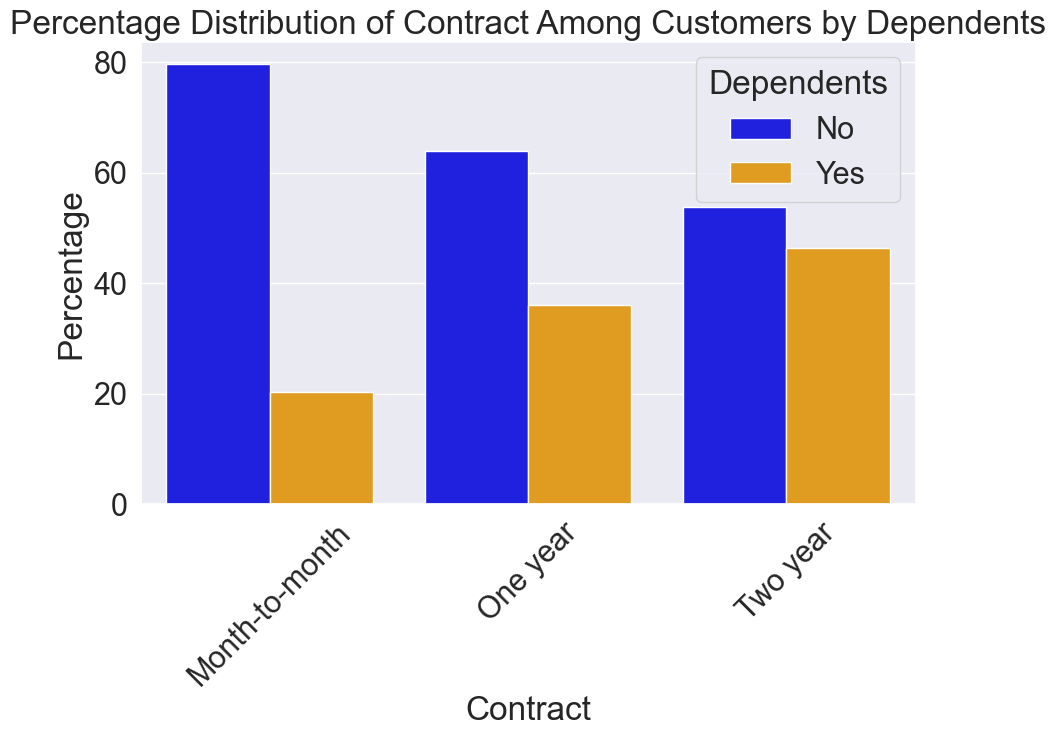

In [ ]:
plot_percentage_cross_distribution(df, 'Contract', 'Dependents')

**Observation:**
- Dependent customers where more inclined to sign longer-term contracts to ensure consistent service for their family.Thus we see lower churn rate among them

**Analysis wrt Partner**

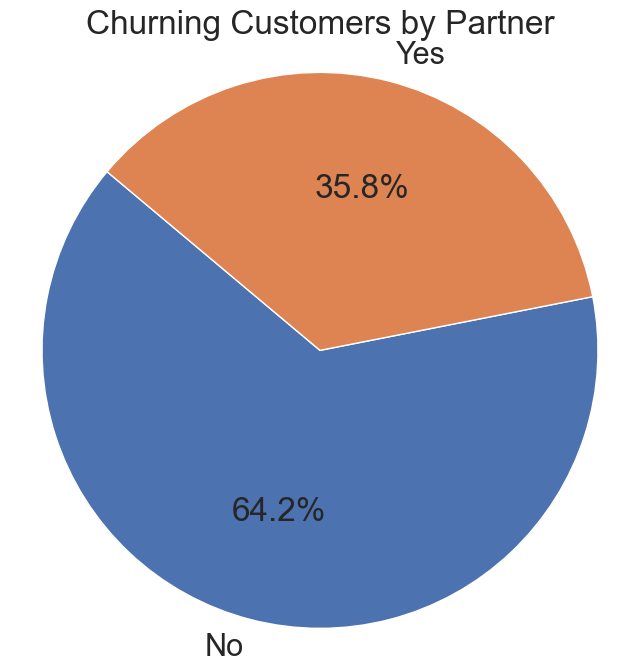

In [ ]:
plot_churn_distribution_pie('Partner')

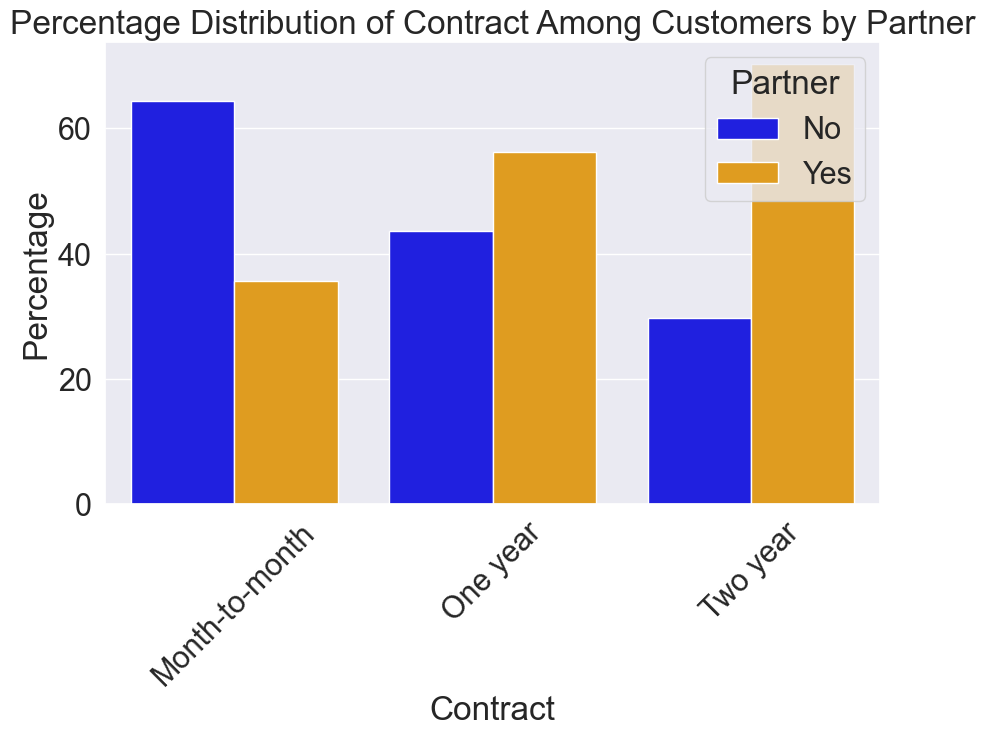

In [ ]:
plot_percentage_cross_distribution(df, 'Contract', 'Partner')

**Observation** :Those with partners tend to sign longer-term contracts

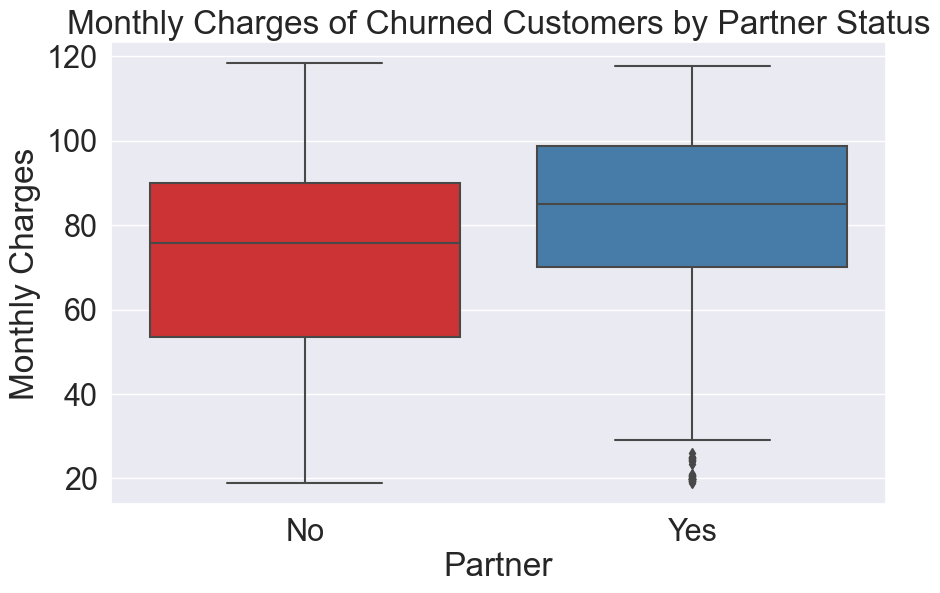

In [ ]:
# Create a box plot for monthly charges by Partner status
plt.figure(figsize=(10, 6))
sns.boxplot(data=churning_customers, x='Partner', y='MonthlyCharges', palette='Set1')
plt.xlabel('Partner')
plt.ylabel('Monthly Charges')
plt.title('Monthly Charges of Churned Customers by Partner Status')
plt.xticks(rotation=0)
plt.show()


 
**Observation:**
- Monthly charges for customers with partners are higher
- Customers with partners might opt for bundled services that include more features or higher-speed internet, leading to higher monthly charges.(eg OTT bundle services)

**Analysis wrt Senior Citizen**

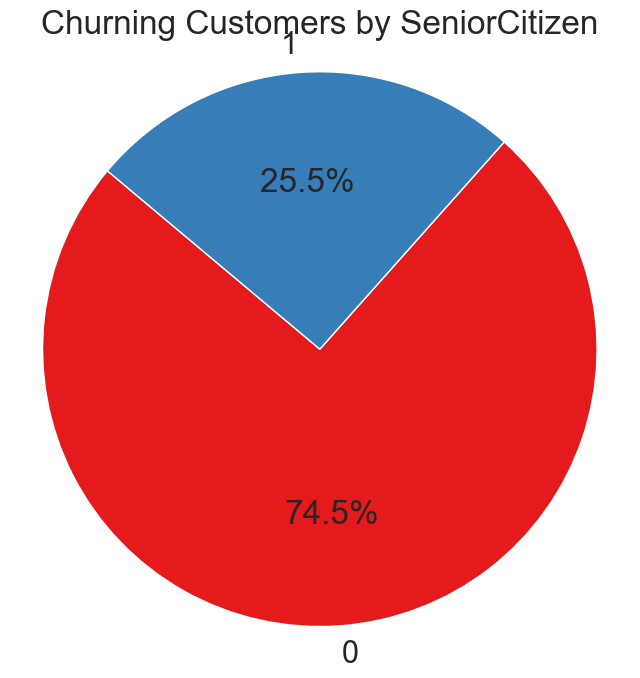

In [ ]:
plot_churn_distribution_pie('SeniorCitizen')

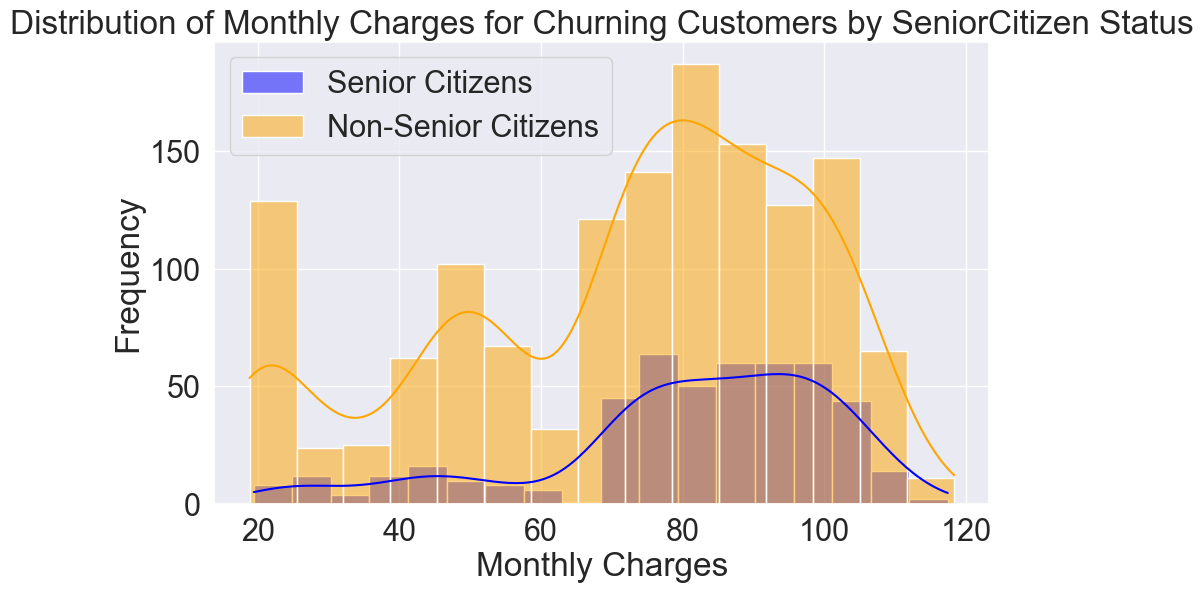

In [ ]:
# Create two dataframes: one for senior citizens and one for non-senior citizens
senior_citizens = churning_customers[churning_customers['SeniorCitizen'] == 1]
non_senior_citizens = churning_customers[churning_customers['SeniorCitizen'] == 0]

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the distribution of MonthlyCharges for senior citizens
sns.histplot(data=senior_citizens, x='MonthlyCharges', label='Senior Citizens', color='blue', kde=True)

# Plot the distribution of MonthlyCharges for non-senior citizens
sns.histplot(data=non_senior_citizens, x='MonthlyCharges', label='Non-Senior Citizens', color='orange', kde=True)

# Add labels and title
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Monthly Charges for Churning Customers by SeniorCitizen Status')
plt.legend()
plt.show()


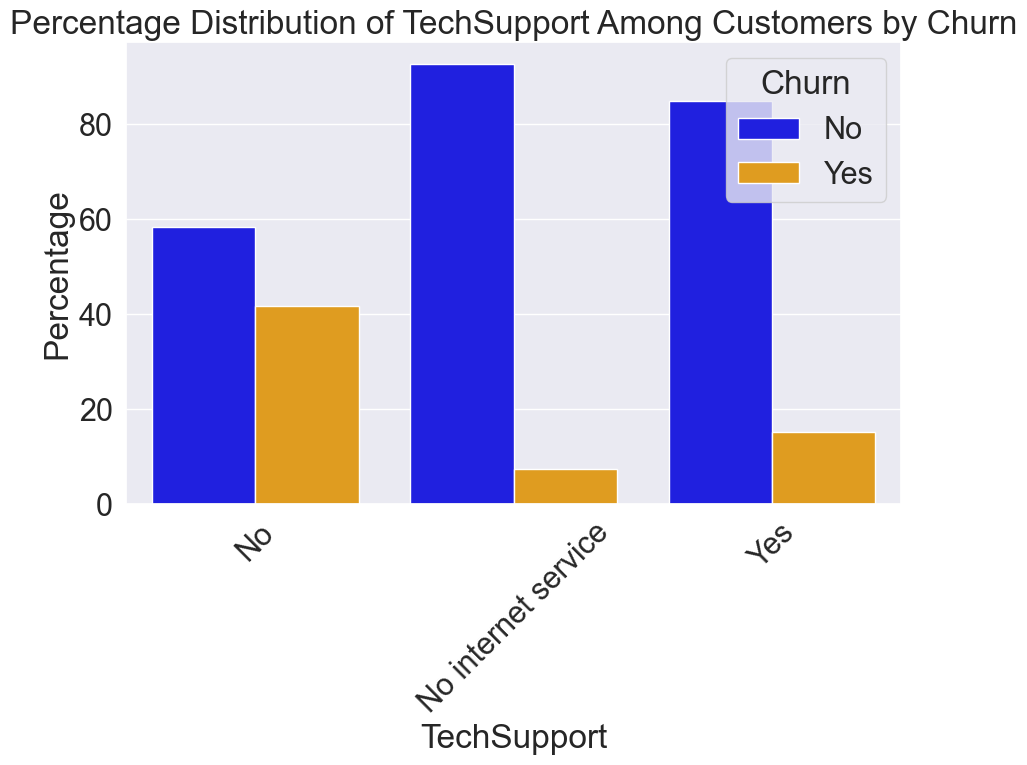

In [ ]:
plot_percentage_cross_distribution(df,'TechSupport','Churn')

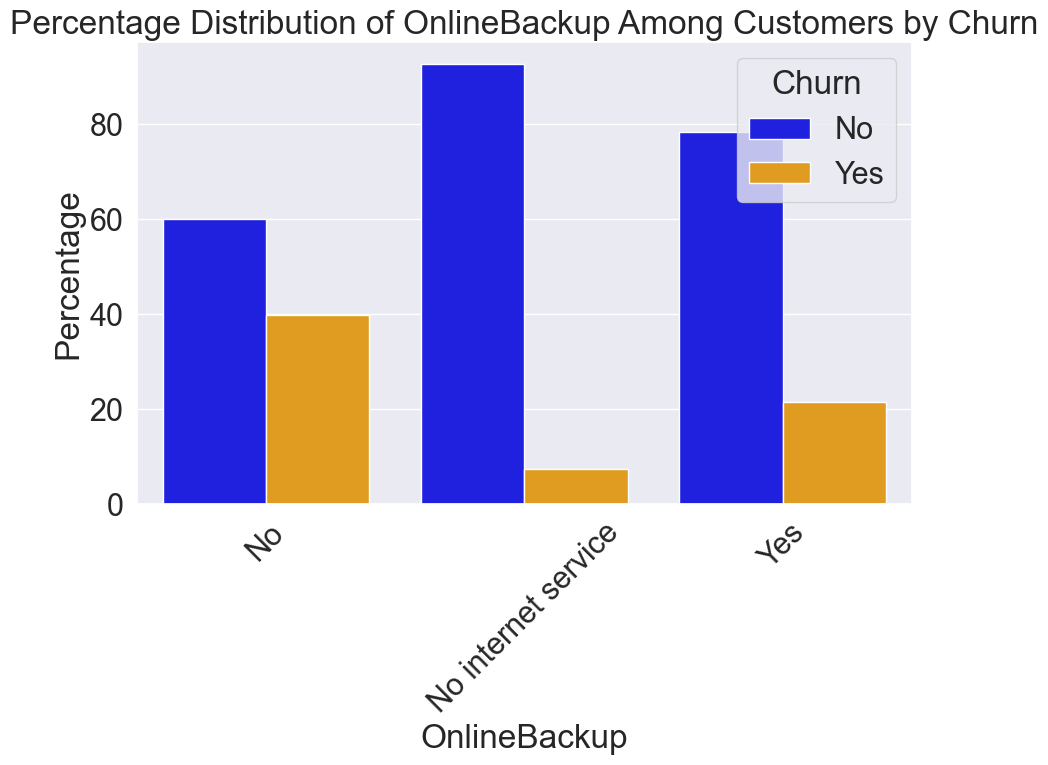

In [ ]:
plot_percentage_cross_distribution(df,'OnlineBackup','Churn')

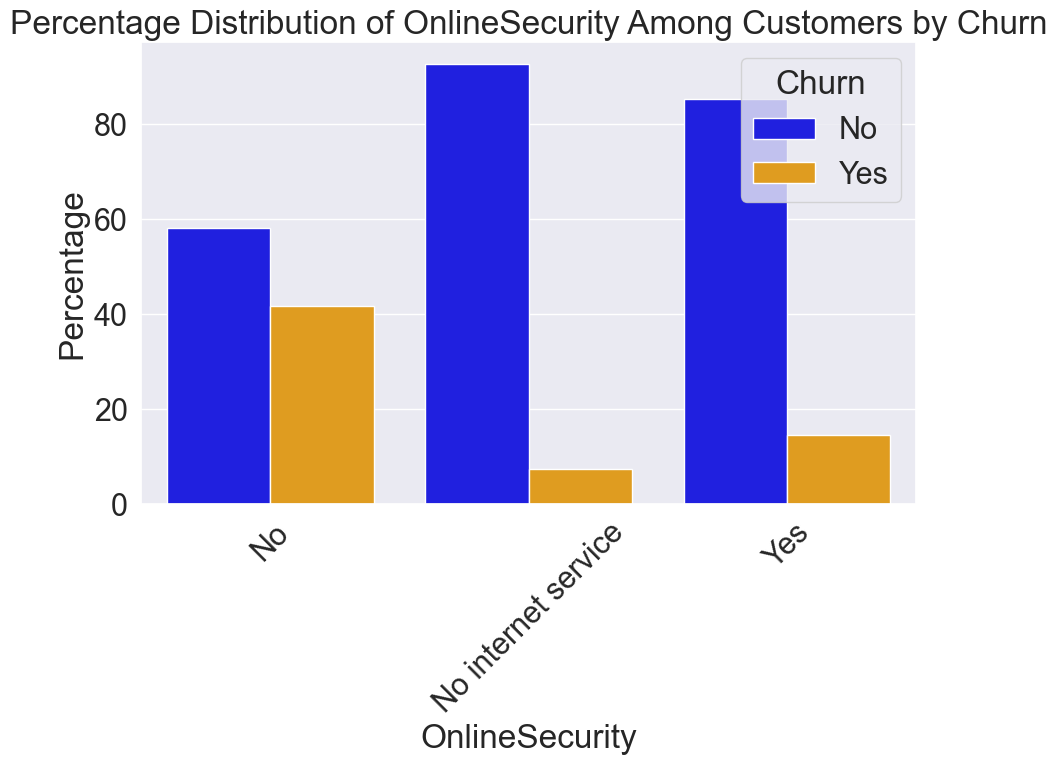

In [ ]:
plot_percentage_cross_distribution(df,'OnlineSecurity','Churn')

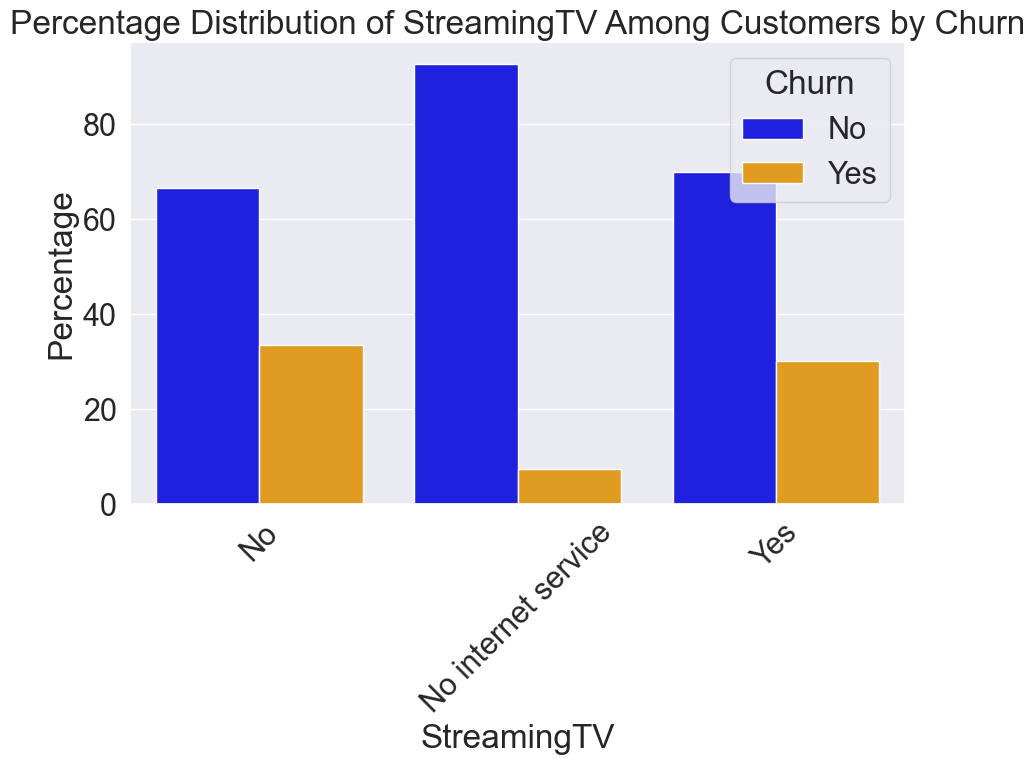

In [ ]:
plot_percentage_cross_distribution(df,'StreamingTV','Churn')

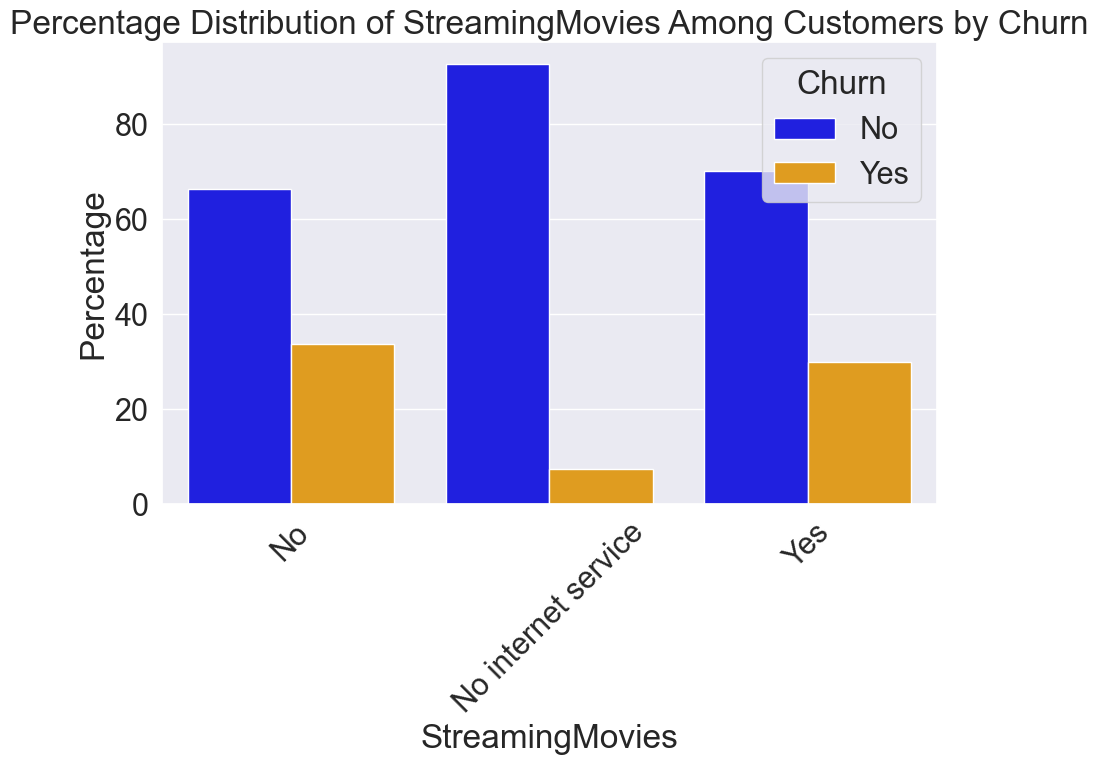

In [ ]:
plot_percentage_cross_distribution(df,'StreamingMovies','Churn')

**Observation:**
Clearly customers with no add-on services churn more